<h3> Importation des librairies

In [395]:
!pip install git+https://github.com/SciTools/cartopy.git --no-binary cartopy

  Cloning https://github.com/SciTools/cartopy.git to /tmp/pip-req-build-n4ngzs5s
  Running command git clone -q https://github.com/SciTools/cartopy.git /tmp/pip-req-build-n4ngzs5s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Cartopy: filename=Cartopy-0.19.0.post2.dev6+g32b203b-cp37-cp37m-linux_x86_64.whl size=12515201 sha256=468b553b3d3fa4a643472bcc7da3666da27447400f6b6402640be54293ea33b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-wxdtye53/wheels/ac/33/64/1a2fddaf0a5f699bb6848296a57ca902f5320baa86e8518b3b
Successfully built Cartopy


In [396]:
!pip install plotly

In [397]:
!pip install pca

In [398]:
!pip install pingouin

In [399]:
!pip install geoplot

In [400]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn import decomposition
from sklearn import preprocessing
from pca import pca
import plotly.express as px

import pingouin as pg
from pingouin import welch_anova, read_dataset
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import levene
import statsmodels.api as sm 
import pylab as py  
from scipy.stats import shapiro
from scipy.stats import ks_2samp

In [401]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3> Importation des fichier csv et transformation en DataFrame

In [402]:
df_population = pd.read_csv("/content/drive/MyDrive/Openclassroom/P5/Population.csv")
df_animaux = pd.read_csv("/content/drive/MyDrive/Openclassroom/P5/Animaux.csv")
df_vegetaux = pd.read_csv("/content/drive/MyDrive/Openclassroom/P5/Végétaux.csv")
df_pib = pd.read_csv("/content/drive/MyDrive/Openclassroom/P5/PIB.csv")

<h3> Visualisation de la forme du tableau </h3>

In [403]:
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN


In [404]:
df_animaux.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2731,Viande de Bovins,2018,2018,Kcal/personne/jour,21.00,Fc,Donnée calculée
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2018,2018,g/personne/jour,1.51,Fc,Donnée calculée
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2732,Viande d'Ovins/Caprins,2018,2018,Kcal/personne/jour,27.00,Fc,Donnée calculée
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2732,Viande d'Ovins/Caprins,2018,2018,g/personne/jour,1.68,Fc,Donnée calculée
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2733,Viande de porcins,2018,2018,Kcal/personne/jour,0.00,Fc,Donnée calculée


In [405]:
df_vegetaux.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé et produits,2018,2018,Kcal/personne/jour,1360.00,Fc,Donnée calculée
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2511,Blé et produits,2018,2018,g/personne/jour,36.64,Fc,Donnée calculée
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz et produits,2018,2018,Kcal/personne/jour,108.00,Fc,Donnée calculée
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2805,Riz et produits,2018,2018,g/personne/jour,2.06,Fc,Donnée calculée
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge et produits,2018,2018,Kcal/personne/jour,12.00,Fc,Donnée calculée


In [406]:
df_pib.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,2190.2,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,12630.8,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,13601.3,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,11479.5,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,53660.0,X,Sources internationales sûres,NaN


<h3> Suppression de la chine qui est comptée en double 

In [407]:
df_population['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis'

In [408]:
df_population_mondiale=df_population[~(df_population["Zone"]=="Chine")]

<h3> Sélection des colonnes importantes 

In [409]:
df_population_mondiales=df_population_mondiale[['Code zone','Zone','Code année','Valeur']]
df_population_mondiales

,Code zone,Zone,Code année,Valeur
0,2,Afghanistan,2017,36296.113
1,2,Afghanistan,2018,37171.921
2,202,Afrique du Sud,2017,57009.756
3,202,Afrique du Sud,2018,57792.518
4,3,Albanie,2017,2884.169
...,...,...,...,...
469,249,Yémen,2018,28498.683
470,251,Zambie,2017,16853.599
471,251,Zambie,2018,17351.708
472,181,Zimbabwe,2017,14236.595


<h3> Pivot de la table population

In [410]:
df_population_mondiales_pivot=df_population_mondiales.pivot_table(index=['Code zone','Zone'],values=['Valeur'],columns='Code année')
df_population_mondiales_pivot.columns = ['Population 2017','Population 2018']
df_population_mondiales_pivot=df_population_mondiales_pivot.reset_index()
df_population_mondiales_pivot

,Code zone,Zone,Population 2017,Population 2018
0,1,Arménie,2944.791,2951.745
1,2,Afghanistan,36296.113,37171.921
2,3,Albanie,2884.169,2882.740
3,4,Algérie,41389.189,42228.408
4,5,Samoa américaines,55.620,55.465
...,...,...,...,...
231,279,Curaçao,161.997,162.752
232,280,Sint Maarten (partie néerlandaise),41.444,41.940
233,281,Saint-Martin (partie française),36.560,37.264
234,282,Saint-Barthélemy,9.784,9.816


<h3> Création d'une colonne différence de population entre l'année 2018 et l'année 2017 en %

In [411]:
df_population_mondiales_pivot['Différence population (%)']=((df_population_mondiales_pivot["Population 2018"]-df_population_mondiales_pivot['Population 2017'])/df_population_mondiales_pivot['Population 2017'])*100
df_population_mondiales_pivot

,Code zone,Zone,Population 2017,Population 2018,Différence population (%)
0,1,Arménie,2944.791,2951.745,0.236146
1,2,Afghanistan,36296.113,37171.921,2.412953
2,3,Albanie,2884.169,2882.740,-0.049546
3,4,Algérie,41389.189,42228.408,2.027629
4,5,Samoa américaines,55.620,55.465,-0.278677
...,...,...,...,...,...
231,279,Curaçao,161.997,162.752,0.466058
232,280,Sint Maarten (partie néerlandaise),41.444,41.940,1.196796
233,281,Saint-Martin (partie française),36.560,37.264,1.925602
234,282,Saint-Barthélemy,9.784,9.816,0.327065


<h3> Concaténation des fichiers animaux et végétaux 

In [412]:
df_animaux['Type de produit'] = 'Animal'
df_vegetaux['Type de produit'] = 'Végétal'

In [413]:
df_vegetaux_animaux = df_vegetaux.append(df_animaux)

In [414]:
df_vegetaux_animaux

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Type de produit
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé et produits,2018,2018,Kcal/personne/jour,1360.00,Fc,Donnée calculée,Végétal
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2511,Blé et produits,2018,2018,g/personne/jour,36.64,Fc,Donnée calculée,Végétal
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz et produits,2018,2018,Kcal/personne/jour,108.00,Fc,Donnée calculée,Végétal
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2805,Riz et produits,2018,2018,g/personne/jour,2.06,Fc,Donnée calculée,Végétal
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge et produits,2018,2018,Kcal/personne/jour,12.00,Fc,Donnée calculée,Végétal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2767,"Mollusques, Autres",2018,2018,g/personne/jour,0.00,Fc,Donnée calculée,Animal
7518,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2769,Animaux Aquatiques Autre,2018,2018,Kcal/personne/jour,0.00,Fc,Donnée calculée,Animal
7519,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2769,Animaux Aquatiques Autre,2018,2018,g/personne/jour,0.00,Fc,Donnée calculée,Animal
7520,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2775,Plantes Aquatiques,2018,2018,Kcal/personne/jour,0.00,Fc,Donnée calculée,Animal


In [415]:
df_vegetaux_animaux['Élément'].unique()

array(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)'],
      dtype=object)

<h3> Pivot du tableau df_vegetaux_animaux

In [416]:
df_vegetaux_animaux_pivot = df_vegetaux_animaux.pivot_table(index=['Code zone', 'Zone','Code Produit','Produit','Type de produit','Année'],values=['Valeur'],aggfunc = sum,columns=['Élément'])
df_vegetaux_animaux_pivot.columns = ['Disponibilité alimentaire (Kcal/personne/jour)', 
                               'Disponibilité de protéines en quantité (g/personne/jour)']
df_vegetaux_animaux_pivot = df_vegetaux_animaux_pivot.reset_index()
df_vegetaux_animaux_pivot

,Code zone,Zone,Code Produit,Produit,Type de produit,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,2511,Blé et produits,Végétal,2018,1151.0,34.25
1,1,Arménie,2513,Orge et produits,Végétal,2018,6.0,0.20
2,1,Arménie,2514,Maïs et produits,Végétal,2018,1.0,0.03
3,1,Arménie,2515,Seigle et produits,Végétal,2018,1.0,0.03
4,1,Arménie,2516,Avoine,Végétal,2018,6.0,0.23
...,...,...,...,...,...,...,...,...
14720,351,Chine,2781,Huiles de Poissons,Animal,2018,0.0,0.00
14721,351,Chine,2782,Huiles de Foie de Poisso,Animal,2018,0.0,0.00
14722,351,Chine,2805,Riz et produits,Végétal,2018,813.0,14.80
14723,351,Chine,2848,Lait - Excl Beurre,Animal,2018,52.0,2.72


<h3> Fusion des tableaux population et df_vegetaux_animaux

In [417]:
disponibilité_personnes = df_population_mondiales_pivot.merge(df_vegetaux_animaux_pivot,how='inner',on=['Code zone','Zone'])
disponibilité_personnes

,Code zone,Zone,Population 2017,Population 2018,Différence population (%),Code Produit,Produit,Type de produit,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,2944.791,2951.745,0.236146,2511,Blé et produits,Végétal,2018,1151.0,34.25
1,1,Arménie,2944.791,2951.745,0.236146,2513,Orge et produits,Végétal,2018,6.0,0.20
2,1,Arménie,2944.791,2951.745,0.236146,2514,Maïs et produits,Végétal,2018,1.0,0.03
3,1,Arménie,2944.791,2951.745,0.236146,2515,Seigle et produits,Végétal,2018,1.0,0.03
4,1,Arménie,2944.791,2951.745,0.236146,2516,Avoine,Végétal,2018,6.0,0.23
...,...,...,...,...,...,...,...,...,...,...,...
14627,276,Soudan,40813.397,41801.533,2.421107,2781,Huiles de Poissons,Animal,2018,0.0,0.00
14628,276,Soudan,40813.397,41801.533,2.421107,2782,Huiles de Foie de Poisso,Animal,2018,0.0,0.00
14629,276,Soudan,40813.397,41801.533,2.421107,2805,Riz et produits,Végétal,2018,19.0,0.36
14630,276,Soudan,40813.397,41801.533,2.421107,2848,Lait - Excl Beurre,Animal,2018,205.0,9.96


<h3> Création d'une colonne disponibilité alimentaire en protéines et en calorie par habitant

In [418]:
disponibilité_personnes['Disponibilité en protéines par habitant (g/personne)']=(df_vegetaux_animaux_pivot['Disponibilité de protéines en quantité (g/personne/jour)']*365)
disponibilité_personnes['Disponibilité en calories par habitant (kcal/personne)']=df_vegetaux_animaux_pivot['Disponibilité alimentaire (Kcal/personne/jour)']*365
disponibilité_personnes

,Code zone,Zone,Population 2017,Population 2018,Différence population (%),Code Produit,Produit,Type de produit,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne)
0,1,Arménie,2944.791,2951.745,0.236146,2511,Blé et produits,Végétal,2018,1151.0,34.25,12501.25,420115.0
1,1,Arménie,2944.791,2951.745,0.236146,2513,Orge et produits,Végétal,2018,6.0,0.20,73.00,2190.0
2,1,Arménie,2944.791,2951.745,0.236146,2514,Maïs et produits,Végétal,2018,1.0,0.03,10.95,365.0
3,1,Arménie,2944.791,2951.745,0.236146,2515,Seigle et produits,Végétal,2018,1.0,0.03,10.95,365.0
4,1,Arménie,2944.791,2951.745,0.236146,2516,Avoine,Végétal,2018,6.0,0.23,83.95,2190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,276,Soudan,40813.397,41801.533,2.421107,2781,Huiles de Poissons,Animal,2018,0.0,0.00,0.00,0.0
14628,276,Soudan,40813.397,41801.533,2.421107,2782,Huiles de Foie de Poisso,Animal,2018,0.0,0.00,0.00,0.0
14629,276,Soudan,40813.397,41801.533,2.421107,2805,Riz et produits,Végétal,2018,19.0,0.36,131.40,6935.0
14630,276,Soudan,40813.397,41801.533,2.421107,2848,Lait - Excl Beurre,Animal,2018,205.0,9.96,3635.40,74825.0


<h3> Création d'une colonne disponibilité en protéines (kg)

In [419]:
disponibilité_personnes['Disponibilité en protéines (kg)']=disponibilité_personnes['Disponibilité de protéines en quantité (g/personne/jour)']*disponibilité_personnes['Population 2018']*365
disponibilité_personnes

,Code zone,Zone,Population 2017,Population 2018,Différence population (%),Code Produit,Produit,Type de produit,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Disponibilité en protéines (kg)
0,1,Arménie,2944.791,2951.745,0.236146,2511,Blé et produits,Végétal,2018,1151.0,34.25,12501.25,420115.0,3.690050e+07
1,1,Arménie,2944.791,2951.745,0.236146,2513,Orge et produits,Végétal,2018,6.0,0.20,73.00,2190.0,2.154774e+05
2,1,Arménie,2944.791,2951.745,0.236146,2514,Maïs et produits,Végétal,2018,1.0,0.03,10.95,365.0,3.232161e+04
3,1,Arménie,2944.791,2951.745,0.236146,2515,Seigle et produits,Végétal,2018,1.0,0.03,10.95,365.0,3.232161e+04
4,1,Arménie,2944.791,2951.745,0.236146,2516,Avoine,Végétal,2018,6.0,0.23,83.95,2190.0,2.477990e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,276,Soudan,40813.397,41801.533,2.421107,2781,Huiles de Poissons,Animal,2018,0.0,0.00,0.00,0.0,0.000000e+00
14628,276,Soudan,40813.397,41801.533,2.421107,2782,Huiles de Foie de Poisso,Animal,2018,0.0,0.00,0.00,0.0,0.000000e+00
14629,276,Soudan,40813.397,41801.533,2.421107,2805,Riz et produits,Végétal,2018,19.0,0.36,131.40,6935.0,5.492721e+06
14630,276,Soudan,40813.397,41801.533,2.421107,2848,Lait - Excl Beurre,Animal,2018,205.0,9.96,3635.40,74825.0,1.519653e+08


<h3> Sélection de la viande de volaille

In [420]:
volailles=disponibilité_personnes.loc[(disponibilité_personnes["Produit"]=="Viande de Volailles")]
df_volailles=volailles[['Zone','Disponibilité en protéines (kg)']].rename(columns={'Disponibilité en protéines (kg)':'Disponibilité en protéines de volailles (kg)'})
df_volailles

,Zone,Disponibilité en protéines de volailles (kg)
59,Arménie,5.526995e+06
143,Afghanistan,6.919553e+06
210,Albanie,3.703744e+06
295,Algérie,3.267634e+07
385,Angola,4.498229e+07
...,...,...
14273,Belgique,1.701544e+07
14353,Luxembourg,1.658532e+06
14433,Serbie,1.291628e+07
14518,Monténégro,1.400108e+06


<h3> Regroupement des produits végétale et animale des différents pays afin de déterminer la disponibilé en protéine par pays

In [421]:
dispo_pays=disponibilité_personnes.groupby(['Code zone','Zone','Type de produit','Population 2018','Différence population (%)']).agg({'Disponibilité en protéines (kg)':'sum','Disponibilité en protéines par habitant (g/personne)':'sum','Disponibilité en calories par habitant (kcal/personne)':'sum'})
dispo_pays=dispo_pays.reset_index()
dispo_pays

,Code zone,Zone,Type de produit,Population 2018,Différence population (%),Disponibilité en protéines (kg),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne)
0,1,Arménie,Animal,2951.745,0.236146,4.881640e+07,16538.15,290175.0
1,1,Arménie,Végétal,2951.745,0.236146,5.278119e+07,17881.35,801905.0
2,2,Afghanistan,Animal,37171.921,2.412953,1.463960e+08,3938.35,69350.0
3,2,Afghanistan,Végétal,37171.921,2.412953,6.066142e+08,16319.15,674520.0
4,3,Albanie,Animal,2882.740,-0.049546,6.496283e+07,22535.10,366460.0
...,...,...,...,...,...,...,...,...
341,272,Serbie,Végétal,8802.754,-0.304362,1.357173e+08,15417.60,741315.0
342,273,Monténégro,Animal,627.809,0.039199,1.609781e+07,25641.25,454060.0
343,273,Monténégro,Végétal,627.809,0.039199,1.009636e+07,16081.90,823075.0
344,276,Soudan,Animal,41801.533,2.421107,3.072872e+08,7351.10,131035.0


<h3> Regroupement des différents pays afin de déterminer la disponibilé en protéine totale par habitant pays

In [422]:
dispo_total_habitant_pays=disponibilité_personnes.groupby(['Zone']).agg({'Disponibilité en protéines par habitant (g/personne)':'sum','Disponibilité en calories par habitant (kcal/personne)':'sum','Disponibilité en protéines (kg)':'sum'})
dispo_total_habitant_pays=dispo_total_habitant_pays.reset_index()
dispo_total_habitant_pays

,Zone,Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Disponibilité en protéines (kg)
0,Afghanistan,20257.50,743870.0,7.530102e+08
1,Afrique du Sud,30795.05,1056675.0,1.779723e+09
2,Albanie,42219.55,1226765.0,1.217080e+08
3,Algérie,33514.30,1212165.0,1.415256e+09
4,Allemagne,38379.75,1297210.0,3.190294e+09
...,...,...,...,...
168,Émirats arabes unis,40193.80,1208880.0,3.871048e+08
169,Équateur,24068.10,951555.0,4.111880e+08
170,États-Unis d'Amérique,41456.70,1378605.0,1.356033e+10
171,Éthiopie,24210.45,853005.0,2.644372e+09


<h3> Pivot de la table dispo_pays afin de visualiser les disponibilité en protéine animales et végétale

In [423]:
dispo_pays_pivot = dispo_pays.pivot_table(index=['Code zone','Zone','Population 2018','Différence population (%)'],values=['Disponibilité en protéines (kg)'],columns=['Type de produit'])
dispo_pays_pivot.columns = ['Dispo protéines animale (kg)', 
                               'Dispo protéines végétale (kg)']
dispo_pays_pivot = dispo_pays_pivot.reset_index()
dispo_pays_pivot

,Code zone,Zone,Population 2018,Différence population (%),Dispo protéines animale (kg),Dispo protéines végétale (kg)
0,1,Arménie,2951.745,0.236146,4.881640e+07,5.278119e+07
1,2,Afghanistan,37171.921,2.412953,1.463960e+08,6.066142e+08
2,3,Albanie,2882.740,-0.049546,6.496283e+07,5.674515e+07
3,4,Algérie,42228.408,2.027629,3.810185e+08,1.034237e+09
4,7,Angola,30809.787,3.330411,1.834153e+08,4.131623e+08
...,...,...,...,...,...,...
168,255,Belgique,11482.178,0.546685,2.454666e+08,1.722499e+08
169,256,Luxembourg,604.245,2.083932,1.487826e+07,9.007239e+06
170,272,Serbie,8802.754,-0.304362,1.351069e+08,1.357173e+08
171,273,Monténégro,627.809,0.039199,1.609781e+07,1.009636e+07


<h3> Fusion entre la table dispo_pays_pivot et dispo_total_habitant_pays

In [424]:
dispo_pays_habitant=pd.merge(dispo_pays_pivot,dispo_total_habitant_pays,how='inner',on='Zone')
dispo_pays_habitant

,Code zone,Zone,Population 2018,Différence population (%),Dispo protéines animale (kg),Dispo protéines végétale (kg),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Disponibilité en protéines (kg)
0,1,Arménie,2951.745,0.236146,4.881640e+07,5.278119e+07,34419.50,1092080.0,1.015976e+08
1,2,Afghanistan,37171.921,2.412953,1.463960e+08,6.066142e+08,20257.50,743870.0,7.530102e+08
2,3,Albanie,2882.740,-0.049546,6.496283e+07,5.674515e+07,42219.55,1226765.0,1.217080e+08
3,4,Algérie,42228.408,2.027629,3.810185e+08,1.034237e+09,33514.30,1212165.0,1.415256e+09
4,7,Angola,30809.787,3.330411,1.834153e+08,4.131623e+08,19363.25,869795.0,5.965776e+08
...,...,...,...,...,...,...,...,...,...
168,255,Belgique,11482.178,0.546685,2.454666e+08,1.722499e+08,36379.55,1373860.0,4.177165e+08
169,256,Luxembourg,604.245,2.083932,1.487826e+07,9.007239e+06,39529.50,1266550.0,2.388550e+07
170,272,Serbie,8802.754,-0.304362,1.351069e+08,1.357173e+08,30765.85,1030760.0,2.708242e+08
171,273,Monténégro,627.809,0.039199,1.609781e+07,1.009636e+07,41723.15,1277135.0,2.619417e+07


<h3> Fusion entre la table dispo_pays_habitant et df_volailles

In [425]:
dispo_pays_volailles=pd.merge(dispo_pays_habitant,df_volailles,how='inner',on='Zone')
dispo_pays_volailles

,Code zone,Zone,Population 2018,Différence population (%),Dispo protéines animale (kg),Dispo protéines végétale (kg),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Disponibilité en protéines (kg),Disponibilité en protéines de volailles (kg)
0,1,Arménie,2951.745,0.236146,4.881640e+07,5.278119e+07,34419.50,1092080.0,1.015976e+08,5.526995e+06
1,2,Afghanistan,37171.921,2.412953,1.463960e+08,6.066142e+08,20257.50,743870.0,7.530102e+08,6.919553e+06
2,3,Albanie,2882.740,-0.049546,6.496283e+07,5.674515e+07,42219.55,1226765.0,1.217080e+08,3.703744e+06
3,4,Algérie,42228.408,2.027629,3.810185e+08,1.034237e+09,33514.30,1212165.0,1.415256e+09,3.267634e+07
4,7,Angola,30809.787,3.330411,1.834153e+08,4.131623e+08,19363.25,869795.0,5.965776e+08,4.498229e+07
...,...,...,...,...,...,...,...,...,...,...
168,255,Belgique,11482.178,0.546685,2.454666e+08,1.722499e+08,36379.55,1373860.0,4.177165e+08,1.701544e+07
169,256,Luxembourg,604.245,2.083932,1.487826e+07,9.007239e+06,39529.50,1266550.0,2.388550e+07,1.658532e+06
170,272,Serbie,8802.754,-0.304362,1.351069e+08,1.357173e+08,30765.85,1030760.0,2.708242e+08,1.291628e+07
171,273,Monténégro,627.809,0.039199,1.609781e+07,1.009636e+07,41723.15,1277135.0,2.619417e+07,1.400108e+06


<h3> Création d'une colonne proportion de protéines d'origine animal par rapport à la quantité totale de protéines dans la disponibilité alimentaire du produit

In [426]:
dispo_pays_volailles['Proportion protéine animale (%)']=dispo_pays_volailles['Dispo protéines animale (kg)']/(dispo_pays_volailles['Disponibilité en protéines (kg)'])*100
dispo_pays_volailles

,Code zone,Zone,Population 2018,Différence population (%),Dispo protéines animale (kg),Dispo protéines végétale (kg),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Disponibilité en protéines (kg),Disponibilité en protéines de volailles (kg),Proportion protéine animale (%)
0,1,Arménie,2951.745,0.236146,4.881640e+07,5.278119e+07,34419.50,1092080.0,1.015976e+08,5.526995e+06,48.048780
1,2,Afghanistan,37171.921,2.412953,1.463960e+08,6.066142e+08,20257.50,743870.0,7.530102e+08,6.919553e+06,19.441441
2,3,Albanie,2882.740,-0.049546,6.496283e+07,5.674515e+07,42219.55,1226765.0,1.217080e+08,3.703744e+06,53.375983
3,4,Algérie,42228.408,2.027629,3.810185e+08,1.034237e+09,33514.30,1212165.0,1.415256e+09,3.267634e+07,26.922239
4,7,Angola,30809.787,3.330411,1.834153e+08,4.131623e+08,19363.25,869795.0,5.965776e+08,4.498229e+07,30.744581
...,...,...,...,...,...,...,...,...,...,...,...
168,255,Belgique,11482.178,0.546685,2.454666e+08,1.722499e+08,36379.55,1373860.0,4.177165e+08,1.701544e+07,58.763921
169,256,Luxembourg,604.245,2.083932,1.487826e+07,9.007239e+06,39529.50,1266550.0,2.388550e+07,1.658532e+06,62.289935
170,272,Serbie,8802.754,-0.304362,1.351069e+08,1.357173e+08,30765.85,1030760.0,2.708242e+08,1.291628e+07,49.887294
171,273,Monténégro,627.809,0.039199,1.609781e+07,1.009636e+07,41723.15,1277135.0,2.619417e+07,1.400108e+06,61.455691


<h3> Création d'une colonne proportion de protéines de volaille par rapport à la quantité de protéine d'origine animal dans la disponibilité alimentaire 

In [427]:
dispo_pays_volailles['Proportion protéine volailles / prot animale(%)']=dispo_pays_volailles['Disponibilité en protéines de volailles (kg)']/dispo_pays_volailles['Dispo protéines animale (kg)']*100
dispo_pays_volailles

,Code zone,Zone,Population 2018,Différence population (%),Dispo protéines animale (kg),Dispo protéines végétale (kg),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Disponibilité en protéines (kg),Disponibilité en protéines de volailles (kg),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%)
0,1,Arménie,2951.745,0.236146,4.881640e+07,5.278119e+07,34419.50,1092080.0,1.015976e+08,5.526995e+06,48.048780,11.322004
1,2,Afghanistan,37171.921,2.412953,1.463960e+08,6.066142e+08,20257.50,743870.0,7.530102e+08,6.919553e+06,19.441441,4.726599
2,3,Albanie,2882.740,-0.049546,6.496283e+07,5.674515e+07,42219.55,1226765.0,1.217080e+08,3.703744e+06,53.375983,5.701328
3,4,Algérie,42228.408,2.027629,3.810185e+08,1.034237e+09,33514.30,1212165.0,1.415256e+09,3.267634e+07,26.922239,8.576052
4,7,Angola,30809.787,3.330411,1.834153e+08,4.131623e+08,19363.25,869795.0,5.965776e+08,4.498229e+07,30.744581,24.524831
...,...,...,...,...,...,...,...,...,...,...,...,...
168,255,Belgique,11482.178,0.546685,2.454666e+08,1.722499e+08,36379.55,1373860.0,4.177165e+08,1.701544e+07,58.763921,6.931876
169,256,Luxembourg,604.245,2.083932,1.487826e+07,9.007239e+06,39529.50,1266550.0,2.388550e+07,1.658532e+06,62.289935,11.147347
170,272,Serbie,8802.754,-0.304362,1.351069e+08,1.357173e+08,30765.85,1030760.0,2.708242e+08,1.291628e+07,49.887294,9.560048
171,273,Monténégro,627.809,0.039199,1.609781e+07,1.009636e+07,41723.15,1277135.0,2.619417e+07,1.400108e+06,61.455691,8.697509


<h3> Sélection des colonnes importante de la table dispo_pays_volailles

In [428]:
disponibilité_pays_volailles=dispo_pays_volailles[['Zone','Population 2018','Différence population (%)','Disponibilité en protéines par habitant (g/personne)','Disponibilité en calories par habitant (kcal/personne)','Proportion protéine animale (%)','Proportion protéine volailles / prot animale(%)']]
disponibilité_pays_volailles

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%)
0,Arménie,2951.745,0.236146,34419.50,1092080.0,48.048780,11.322004
1,Afghanistan,37171.921,2.412953,20257.50,743870.0,19.441441,4.726599
2,Albanie,2882.740,-0.049546,42219.55,1226765.0,53.375983,5.701328
3,Algérie,42228.408,2.027629,33514.30,1212165.0,26.922239,8.576052
4,Angola,30809.787,3.330411,19363.25,869795.0,30.744581,24.524831
...,...,...,...,...,...,...,...
168,Belgique,11482.178,0.546685,36379.55,1373860.0,58.763921,6.931876
169,Luxembourg,604.245,2.083932,39529.50,1266550.0,62.289935,11.147347
170,Serbie,8802.754,-0.304362,30765.85,1030760.0,49.887294,9.560048
171,Monténégro,627.809,0.039199,41723.15,1277135.0,61.455691,8.697509


<h3> Fusion des tableaux disponibilité personnes et df_pib_mondiales

In [429]:
df_pib_sel=df_pib[['Zone','Valeur']].rename(columns={'Valeur' : 'PIB par habitant'})

df_pib_sel

,Zone,PIB par habitant
0,Afghanistan,2190.2
1,Afrique du Sud,12630.8
2,Albanie,13601.3
3,Algérie,11479.5
4,Allemagne,53660.0
...,...,...
180,Uruguay,21590.8
181,Vanuatu,3129.9
182,Viet Nam,7586.4
183,Zambie,3521.5


In [430]:
disponibilité_personnes_pib=pd.merge(disponibilité_pays_volailles,df_pib_sel,how='inner',on='Zone')
disponibilité_personnes_pib

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
0,Arménie,2951.745,0.236146,34419.50,1092080.0,48.048780,11.322004,12715.0
1,Afghanistan,37171.921,2.412953,20257.50,743870.0,19.441441,4.726599,2190.2
2,Albanie,2882.740,-0.049546,42219.55,1226765.0,53.375983,5.701328,13601.3
3,Algérie,42228.408,2.027629,33514.30,1212165.0,26.922239,8.576052,11479.5
4,Angola,30809.787,3.330411,19363.25,869795.0,30.744581,24.524831,6933.5
...,...,...,...,...,...,...,...,...
160,Belgique,11482.178,0.546685,36379.55,1373860.0,58.763921,6.931876,51246.0
161,Luxembourg,604.245,2.083932,39529.50,1266550.0,62.289935,11.147347,114110.0
162,Serbie,8802.754,-0.304362,30765.85,1030760.0,49.887294,9.560048,17355.1
163,Monténégro,627.809,0.039199,41723.15,1277135.0,61.455691,8.697509,20628.6


<h3> Multiplication de la population fois milles

In [431]:
disponibilité_personnes_pib['Population 2018']=disponibilité_personnes_pib["Population 2018"]*1000

<h3> Sélection des colonnes importantes pour créer le tableau données_finale

In [432]:
données_finale=disponibilité_personnes_pib[['Zone','Population 2018','Différence population (%)','Disponibilité en protéines par habitant (g/personne)','Disponibilité en calories par habitant (kcal/personne)','Proportion protéine animale (%)','Proportion protéine volailles / prot animale(%)','PIB par habitant']]
données_finale

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
0,Arménie,2951745.0,0.236146,34419.50,1092080.0,48.048780,11.322004,12715.0
1,Afghanistan,37171921.0,2.412953,20257.50,743870.0,19.441441,4.726599,2190.2
2,Albanie,2882740.0,-0.049546,42219.55,1226765.0,53.375983,5.701328,13601.3
3,Algérie,42228408.0,2.027629,33514.30,1212165.0,26.922239,8.576052,11479.5
4,Angola,30809787.0,3.330411,19363.25,869795.0,30.744581,24.524831,6933.5
...,...,...,...,...,...,...,...,...
160,Belgique,11482178.0,0.546685,36379.55,1373860.0,58.763921,6.931876,51246.0
161,Luxembourg,604245.0,2.083932,39529.50,1266550.0,62.289935,11.147347,114110.0
162,Serbie,8802754.0,-0.304362,30765.85,1030760.0,49.887294,9.560048,17355.1
163,Monténégro,627809.0,0.039199,41723.15,1277135.0,61.455691,8.697509,20628.6


<h2> <center> Analyse univariée 

<h3> Analyse de la différence de population 

In [433]:
données_finale["Différence population (%)"].describe()

count    165.000000
mean       1.269725
std        1.093166
min       -1.551620
25%        0.466284
50%        1.258635
75%        2.027629
max        3.890497
Name: Différence population (%), dtype: float64

En moyenne la population des pays on augmenter de 1.23 % entre 2017 et 2018

Text(0, 0.5, 'Fréquence')

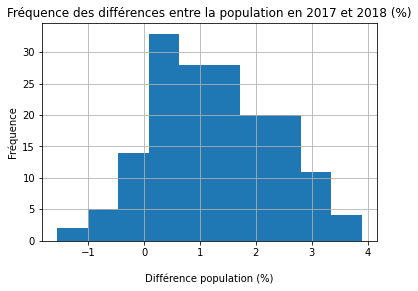

In [434]:
données_finale["Différence population (%)"].hist()
plt.title("Fréquence des différences entre la population en 2017 et 2018 (%)")
plt.xlabel('\nDifférence population (%)')
plt.ylabel('Fréquence')

Pour la pluspart des pays la population augmente de 0.1 à 1.5 % entre 2017 et 2018

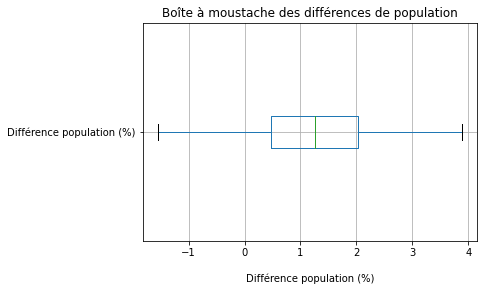

In [435]:
données_finale.boxplot(column="Différence population (%)", vert=False, showfliers=False)
plt.title('Boîte à moustache des différences de population')
plt.xlabel('\nDifférence population (%)')
plt.show()

In [436]:
pays_plus_augmentation_pop=données_finale.nlargest(5,'Différence population (%)')
pays_plus_augmentation_pop

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
106,Niger,22442822.0,3.890497,30134.40,937685.0,14.123062,3.259005,1196.5
89,Maldives,515696.0,3.886769,29638.00,815775.0,60.443350,9.311328,18508.5
149,Ouganda,42729036.0,3.795427,17122.15,723065.0,26.071200,4.415372,2122.1
145,Oman,4829473.0,3.505091,31116.25,1072370.0,49.337243,16.833096,28593.8
4,Angola,30809787.0,3.330411,19363.25,869795.0,30.744581,24.524831,6933.5


Les pays dont la population a le plus évoluer entre 2017 et 2018 sont le Niger, les Maldives et l'Ouganda

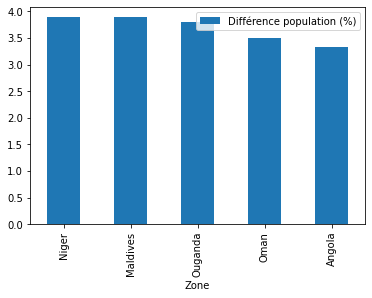

In [437]:
pays_plus_augmentation_pop_graph=pays_plus_augmentation_pop.plot.bar(x='Zone',y='Différence population (%)')


<h3> Analyse de la disponibilité en protéines par habitant des pays

In [438]:
données_finale["Disponibilité en protéines par habitant (g/personne)"].describe()

count      165.000000
mean     29978.290606
std       7614.933138
min      15483.300000
25%      23911.150000
50%      29922.700000
75%      35978.050000
max      53465.200000
Name: Disponibilité en protéines par habitant (g/personne), dtype: float64

En moyenne les pays possèdent une disponibilité en protéine par habitant de 29,8 kg. 

Text(0, 0.5, 'Fréquence')

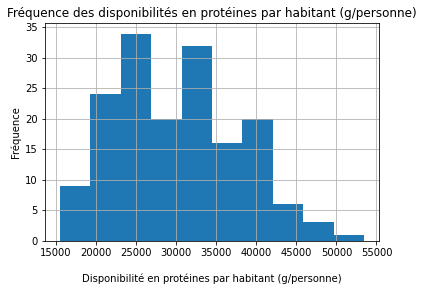

In [439]:
données_finale["Disponibilité en protéines par habitant (g/personne)"].hist()
plt.title("Fréquence des disponibilités en protéines par habitant (g/personne)")
plt.xlabel('\nDisponibilité en protéines par habitant (g/personne)')
plt.ylabel('Fréquence')

Pour la pluspart des pays la disponibilité en protéine par habitant est entre 20 et 35 kg

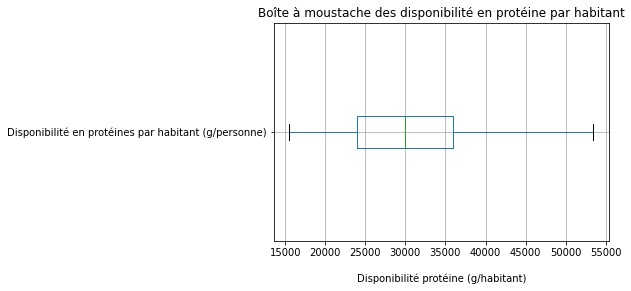

In [440]:
données_finale.boxplot(column="Disponibilité en protéines par habitant (g/personne)", vert=False, showfliers=False)
plt.title('Boîte à moustache des disponibilité en protéine par habitant')
plt.xlabel('\nDisponibilité protéine (g/habitant)')
plt.show()

In [441]:
pays_plus_dispo_prot_habi=données_finale.nlargest(5,"Disponibilité en protéines par habitant (g/personne)")
pays_plus_dispo_prot_habi

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
62,Islande,336713.0,0.693794,53465.20,1334440.0,71.668487,12.078491,56157.5
59,Chine - RAS de Hong-Kong,7371730.0,0.895225,46898.85,1192455.0,73.110748,17.681499,61071.9
67,Israël,8381516.0,1.669948,46289.30,1287355.0,58.894496,37.407953,39543.2
84,Lituanie,2801264.0,-1.551620,46176.15,1244650.0,62.327089,12.720355,35390.0
42,Finlande,5522576.0,0.203307,43062.70,1219100.0,63.934565,10.871006,48191.2


Les pays avec la disponibilité en protéine par habitant la plus élevé sont l'islande, la chine Ras de hong-kong et l'israël.

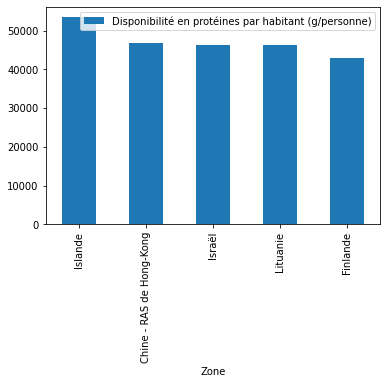

In [442]:
pays_plus_dispo_prot_habi_graph=pays_plus_dispo_prot_habi.plot.bar(x='Zone',y='Disponibilité en protéines par habitant (g/personne)')

<h3> Analyse de la disponibilité en calories par habitant des différents pays

In [443]:
données_finale["Disponibilité en calories par habitant (kcal/personne)"].describe()

count    1.650000e+02
mean     1.050107e+06
std      1.656470e+05
min      6.511600e+05
25%      9.358600e+05
50%      1.040615e+06
75%      1.200120e+06
max      1.418025e+06
Name: Disponibilité en calories par habitant (kcal/personne), dtype: float64

En moyenne les pays possèdent une disponibilité en calories par habitant de 1e+06 kcal

Text(0, 0.5, 'Fréquence')

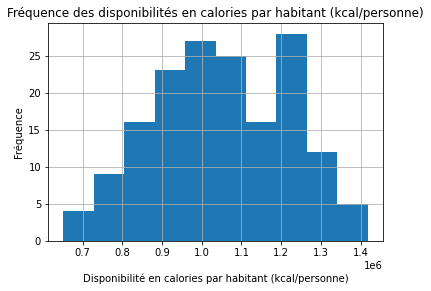

In [444]:
données_finale["Disponibilité en calories par habitant (kcal/personne)"].hist()
plt.title("Fréquence des disponibilités en calories par habitant (kcal/personne)")
plt.xlabel('\nDisponibilité en calories par habitant (kcal/personne)')
plt.ylabel('Fréquence')

Pour la pluspart des pays la disponibilité en calorie par habitant est entre 0.9 et 1.3 e+06 kcal.

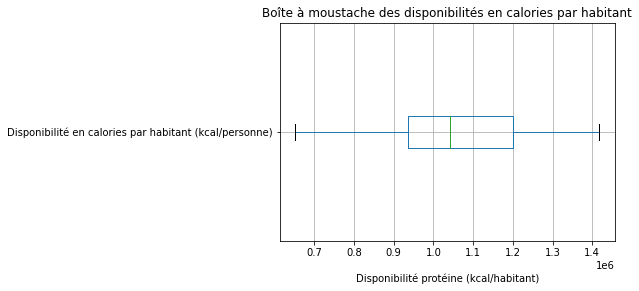

In [445]:
données_finale.boxplot(column="Disponibilité en calories par habitant (kcal/personne)", vert=False, showfliers=False)
plt.title('Boîte à moustache des disponibilités en calories par habitant')
plt.xlabel('\nDisponibilité protéine (kcal/habitant)')
plt.show()

In [446]:
pays_plus_dispo_kcal_habi=données_finale.nlargest(5,"Disponibilité en calories par habitant (kcal/personne)")
pays_plus_dispo_kcal_habi

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
66,Irlande,4818690.0,1.376124,42869.25,1418025.0,61.302682,16.458333,83470.6
152,États-Unis d'Amérique,327096265.0,0.618764,41456.70,1378605.0,64.685684,27.562270,61544.4
160,Belgique,11482178.0,0.546685,36379.55,1373860.0,58.763921,6.931876,51246.0
147,Turquie,82340088.0,1.508496,40401.85,1353420.0,35.685247,17.822785,28298.9
8,Autriche,8891388.0,0.810519,39803.25,1348310.0,60.357634,11.622607,55687.2


Les pays avec la disponibilité en kcal par habitant la plus élevé sont l'irlande, les états-unis et la belgique.

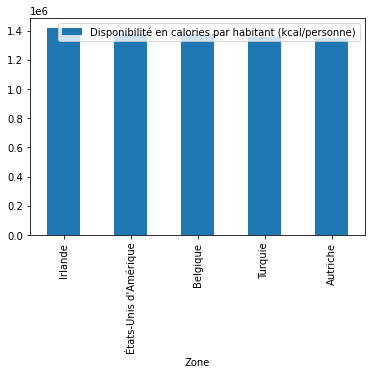

In [447]:
pays_plus_dispo_kcal_habi_graph=pays_plus_dispo_kcal_habi.plot.bar(x='Zone',y='Disponibilité en calories par habitant (kcal/personne)')

<h3> Analyse de la proportion de protéine animale des différents pays

In [448]:
données_finale["Proportion protéine animale (%)"].describe()

count    165.000000
mean      43.021116
std       15.904202
min        9.889944
25%       28.704726
50%       44.377104
75%       56.138008
max       73.110748
Name: Proportion protéine animale (%), dtype: float64

En moyenne les pays possèdent une propotion de protéine animale de 42.9%. 

Text(0, 0.5, 'Fréquence')

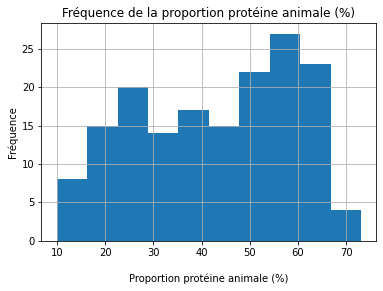

In [449]:
données_finale["Proportion protéine animale (%)"].hist()
plt.title("Fréquence de la proportion protéine animale (%)")
plt.xlabel('\nProportion protéine animale (%)')
plt.ylabel('Fréquence')

Pour la plupart des pays la proportion de protéine animale est entre 15 et 65 %

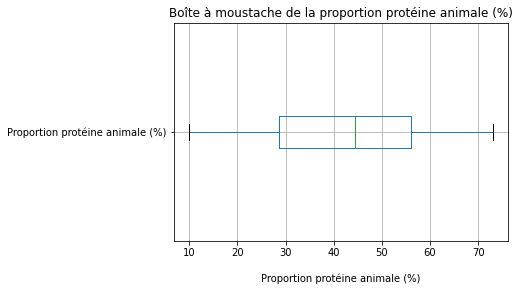

In [450]:
données_finale.boxplot(column="Proportion protéine animale (%)", vert=False, showfliers=False)
plt.title('Boîte à moustache de la proportion protéine animale (%)')
plt.xlabel('\nProportion protéine animale (%)')
plt.show()

In [451]:
pays_plus_propotion_anim=données_finale.nlargest(5,"Proportion protéine animale (%)")
pays_plus_propotion_anim

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
59,Chine - RAS de Hong-Kong,7371730.0,0.895225,46898.85,1192455.0,73.110748,17.681499,61071.9
62,Islande,336713.0,0.693794,53465.20,1334440.0,71.668487,12.078491,56157.5
33,Danemark,5752126.0,0.346320,42708.65,1240635.0,68.139475,14.950458,56102.8
7,Australie,24898152.0,1.275318,38635.25,1237715.0,66.792631,23.917963,49576.0
101,Pays-Bas,17059560.0,0.224500,38861.55,1203405.0,65.567766,7.878527,56454.9


Les pays avec la proportion de protéine animale la plus élevé sont la chine Ras de hong kong, l'islande et le Danemark.

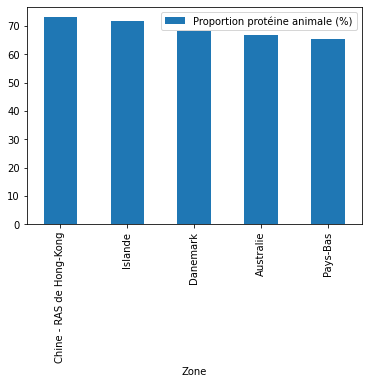

In [452]:
pays_plus_propotion_anim_graph=pays_plus_propotion_anim.plot.bar(x='Zone',y='Proportion protéine animale (%)')

<h3> Analyse de la proportion de protéine de volailles par rapport au protéines animales 

In [453]:
données_finale['Proportion protéine volailles / prot animale(%)'].describe()

count    165.000000
mean      17.852896
std       11.121994
min        1.340483
25%        9.494232
50%       15.763547
75%       25.141777
max       50.654243
Name: Proportion protéine volailles / prot animale(%), dtype: float64

En moyenne les pays possèdent une proportion de protéine de volailles de 18%. 

Text(0, 0.5, 'Fréquence')

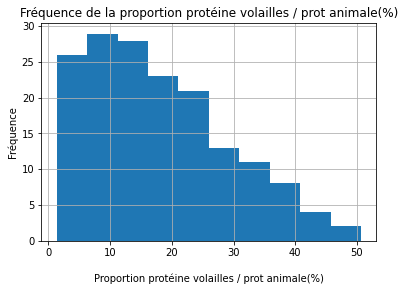

In [454]:
données_finale['Proportion protéine volailles / prot animale(%)'].hist()
plt.title("Fréquence de la proportion protéine volailles / prot animale(%)")
plt.xlabel('\nProportion protéine volailles / prot animale(%)')
plt.ylabel('Fréquence')

La plus part des pays possèdent une proportion de protéine de volaille entre 2 et 25 %

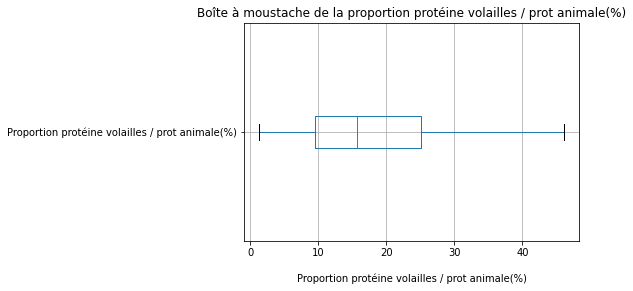

In [455]:
données_finale.boxplot(column="Proportion protéine volailles / prot animale(%)", vert=False, showfliers=False)
plt.title('Boîte à moustache de la proportion protéine volailles / prot animale(%)')
plt.xlabel('\nProportion protéine volailles / prot animale(%)')
plt.show()

In [456]:
pays_plus_propotion_volailles=données_finale.nlargest(5,"Proportion protéine volailles / prot animale(%)")
pays_plus_propotion_volailles

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
126,Saint-Vincent-et-les Grenadines,110211.0,0.349641,32795.25,1082955.0,56.138008,50.654243,12466.4
83,Libéria,4818973.0,2.482803,15622.00,789860.0,27.289720,46.061644,1497.0
144,Trinité-et-Tobago,1389843.0,0.417901,31240.35,1089160.0,51.793434,43.469434,26272.9
71,Jamaïque,2934847.0,0.479279,27729.05,1016525.0,48.637620,42.922869,9738.0
133,Afrique du Sud,57792518.0,1.373032,30795.05,1056675.0,42.716605,42.286349,12630.8


Les pays avec la proportion de protéine de volailles la plus élevé sont la saint-vincent-et-les grenadines, la libéria et la trinité-et-tobago

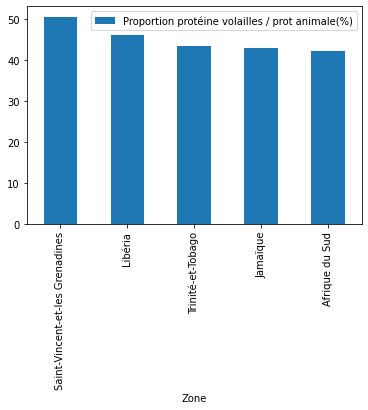

In [457]:
pays_plus_propotion_volailles_graph=pays_plus_propotion_volailles.plot.bar(x='Zone',y='Proportion protéine volailles / prot animale(%)')

<h3> Analyse de la PIB par habitant des différents pays

In [458]:
données_finale['PIB par habitant'].describe()

count       165.000000
mean      20485.727273
std       21205.442395
min         933.100000
25%        5029.200000
50%       12864.600000
75%       29711.900000
max      131908.000000
Name: PIB par habitant, dtype: float64

En moyenne la pluspart des pays possèdent un pib par habitant de 20485 I$

Text(0, 0.5, 'Fréquence')

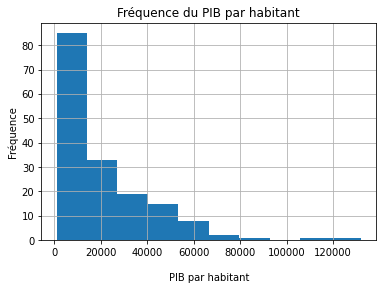

In [459]:
données_finale['PIB par habitant'].hist()
plt.title("Fréquence du PIB par habitant")
plt.xlabel('\nPIB par habitant')
plt.ylabel('Fréquence')

La plus part des pays possèdent un pib par habitant entre 1000 et 18000 I$

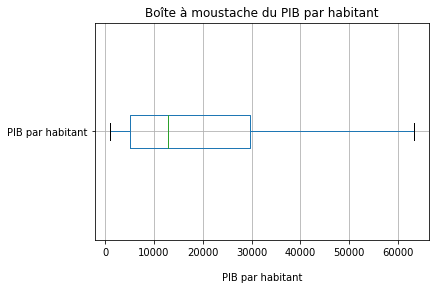

In [460]:
données_finale.boxplot(column="PIB par habitant", vert=False, showfliers=False)
plt.title('Boîte à moustache du PIB par habitant')
plt.xlabel('\nPIB par habitant')
plt.show()

In [461]:
pays_plus_pib=données_finale.nlargest(5,"PIB par habitant")
pays_plus_pib

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
85,Chine - RAS de Macao,631636.0,1.453777,39916.40,1213990.0,64.850037,16.426960,131908.0
161,Luxembourg,604245.0,2.083932,39529.50,1266550.0,62.289935,11.147347,114110.0
66,Irlande,4818690.0,1.376124,42869.25,1418025.0,61.302682,16.458333,83470.6
139,Suisse,8525611.0,0.825551,34784.50,1224575.0,62.801679,10.659983,68479.4
148,Émirats arabes unis,9630959.0,1.515262,40193.80,1208880.0,45.813658,28.800793,66968.3


Les pays avec le pib par habitant la plus élevé sont la chine- Ras de Macao, le luxembourg et l'irlandee

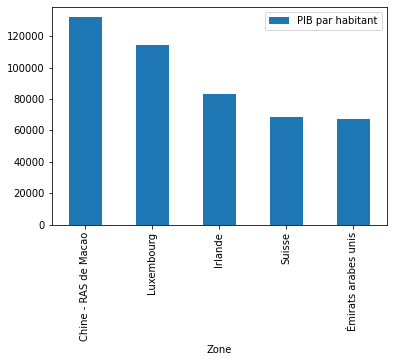

In [462]:
pays_plus_pib_graph=pays_plus_pib.plot.bar(x='Zone',y='PIB par habitant')

<h3> Visualisation de la proportion de protéine animale et de volailles pour 7 pays avec la plus grande proportion de protéine animale

In [463]:
prop_animal_élever_7=données_finale.nlargest(7,"Proportion protéine animale (%)")
prop_animal_élever_7

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
59,Chine - RAS de Hong-Kong,7371730.0,0.895225,46898.85,1192455.0,73.110748,17.681499,61071.9
62,Islande,336713.0,0.693794,53465.20,1334440.0,71.668487,12.078491,56157.5
33,Danemark,5752126.0,0.346320,42708.65,1240635.0,68.139475,14.950458,56102.8
7,Australie,24898152.0,1.275318,38635.25,1237715.0,66.792631,23.917963,49576.0
101,Pays-Bas,17059560.0,0.224500,38861.55,1203405.0,65.567766,7.878527,56454.9
95,Mongolie,3170216.0,1.812263,31860.85,939875.0,65.127735,1.794195,11915.6
9,Bahamas,385637.0,1.016883,29400.75,968710.0,65.052762,37.557252,35500.5


In [464]:
select_prop_animal_élever_7=prop_animal_élever_7[["Zone","Proportion protéine animale (%)","Proportion protéine volailles / prot animale(%)"]]
select_prop_animal_élever_7

,Zone,Proportion protéine animale (%),Proportion protéine volailles / prot animale(%)
59,Chine - RAS de Hong-Kong,73.110748,17.681499
62,Islande,71.668487,12.078491
33,Danemark,68.139475,14.950458
7,Australie,66.792631,23.917963
101,Pays-Bas,65.567766,7.878527
95,Mongolie,65.127735,1.794195
9,Bahamas,65.052762,37.557252


In [465]:
select_prop_animal_élever_7_index=select_prop_animal_élever_7.set_index('Zone')
select_prop_animal_élever_7_index

,Proportion protéine animale (%),Proportion protéine volailles / prot animale(%)
Zone,,
Chine - RAS de Hong-Kong,73.110748,17.681499
Islande,71.668487,12.078491
Danemark,68.139475,14.950458
Australie,66.792631,23.917963
Pays-Bas,65.567766,7.878527
Mongolie,65.127735,1.794195
Bahamas,65.052762,37.557252


Text(0.5, 1.0, 'Proportion de protéine animal et de volailles pour les 7 pays avec une proportion de protéine animale élevé')

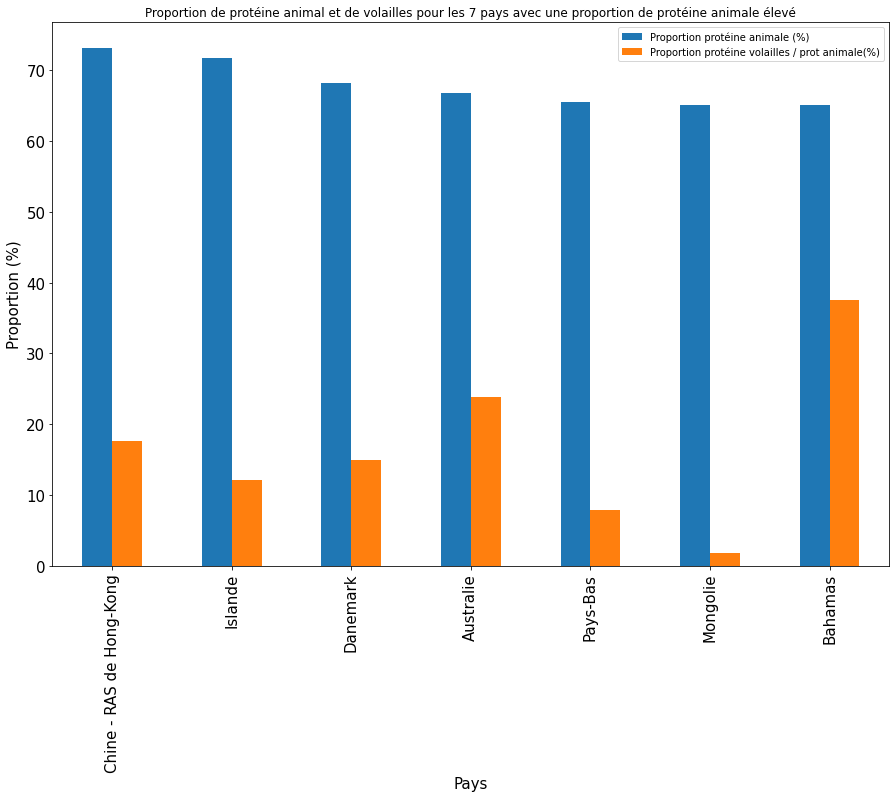

In [466]:
ax = select_prop_animal_élever_7_index.plot.bar(y=["Proportion protéine animale (%)","Proportion protéine volailles / prot animale(%)"],figsize=(15, 10),fontsize=15)
ax.set_ylabel("Proportion (%)", fontsize=15)
ax.set_xlabel("Pays", fontsize=15)
ax.set_title("Proportion de protéine animal et de volailles pour les 7 pays avec une proportion de protéine animale élevé")

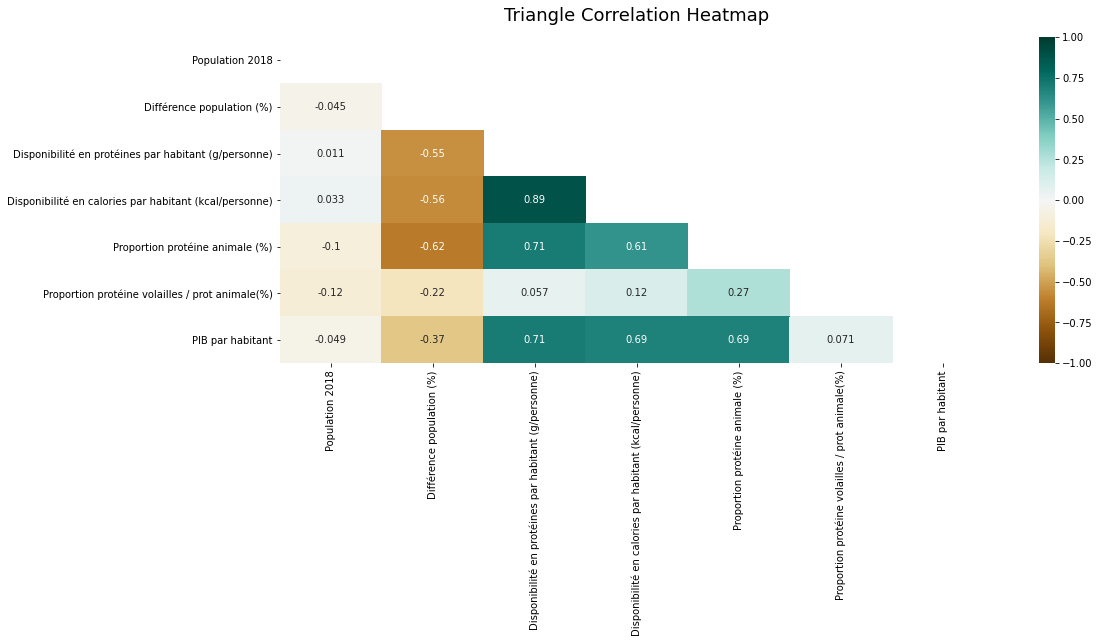

In [467]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(données_finale.corr(), dtype=np.bool))
heatmap = sns.heatmap(données_finale.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

On observe une corrélation possitive entre la disponibilité en calorie et en protéine par habitant. Ainsi qu'une corrélation négative entre la différence de population et la disponibilité en calorie, protéine et en proportion de protéine animale.

<h2> <center> Clustering agglomératif

<h3> Réduction et mise à l'échelle des variables 

In [468]:
scaler = MinMaxScaler()
X_min_max = scaler.fit_transform(données_finale.set_index("Zone"))
X_min_max

array([[2.03090043e-03, 3.28505530e-01, 4.98558524e-01, ...,
        6.03580373e-01, 2.02408443e-01, 8.99554037e-02],
       [2.60014017e-02, 7.28498221e-01, 1.25696713e-01, ...,
        1.51081553e-01, 6.86647322e-02, 9.59802222e-03],
       [1.98256390e-03, 2.76009019e-01, 7.03920815e-01, ...,
        6.87843821e-01, 8.84306037e-02, 9.67223491e-02],
       ...,
       [6.12940707e-03, 2.29186188e-01, 4.02364021e-01, ...,
        6.32661202e-01, 1.66678935e-01, 1.25382802e-01],
       [4.03032976e-04, 2.92316201e-01, 6.90851432e-01, ...,
        8.15645222e-01, 1.49188103e-01, 1.50376141e-01],
       [2.92443458e-02, 7.29996604e-01, 2.93292331e-01, ...,
        2.80315820e-01, 2.71881277e-02, 2.46421261e-02]])

<h3> Clustering hiérarchique et traçage du dendrogramme des pays

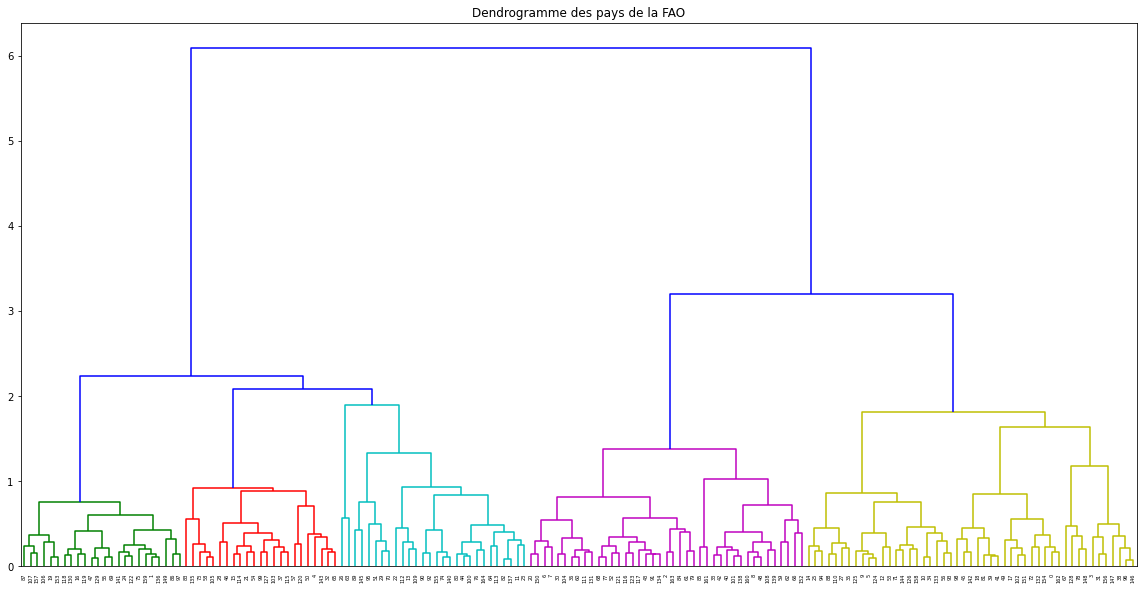

In [469]:
plt.figure(figsize=(20,10))
plt.title("Dendrogramme des pays de la FAO")
dend = shc.dendrogram(shc.linkage(X_min_max, method="ward"),color_threshold=2)

In [470]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity="euclidean", linkage="ward")
données_finale["Cluster"]= cluster.fit_predict(X_min_max)

In [471]:
données_finale.Cluster.value_counts()

1    49
2    41
0    28
3    24
4    23
Name: Cluster, dtype: int64

In [472]:
données_finale.to_csv("/content/drive/MyDrive/Openclassroom/P5/Pays.csv",sep = ';')

In [473]:
mean_clust=données_finale.groupby("Cluster").mean()
mean_clust

,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant
Cluster,,,,,,,
0,1.308126e+08,1.707972,27175.292857,9.754234e+05,38.026025,7.886916,9530.417857
1,2.671928e+07,0.730943,31403.631633,1.085413e+06,47.431958,27.097162,19840.753061
2,2.852243e+07,0.337384,39154.084146,1.241881e+06,60.020154,15.144094,46761.160976
3,3.147140e+07,2.766663,21587.164583,8.554535e+05,20.078773,7.207911,2571.095833
4,1.563371e+07,1.984027,22753.147826,9.270683e+05,33.342290,26.227630,7051.413043


In [474]:
données_finale[données_finale.Cluster==1]

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant,Cluster
0,Arménie,2951745.0,0.236146,34419.50,1092080.0,48.048780,11.322004,12715.0,1
3,Algérie,42228408.0,2.027629,33514.30,1212165.0,26.922239,8.576052,11479.5,1
5,Antigua-et-Barbuda,96286.0,0.901222,29167.15,891330.0,64.747841,36.509470,21115.8,1
9,Bahamas,385637.0,1.016883,29400.75,968710.0,65.052762,37.557252,35500.5,1
10,Barbade,286641.0,0.142891,32517.85,1078575.0,57.267931,31.046648,15674.9,1
12,Bolivie (État plurinational de),11353142.0,1.432047,26718.00,879650.0,48.428962,38.194640,8655.5,1
14,Brésil,209469323.0,0.786927,34915.90,1204500.0,56.199038,28.571429,14596.2,1
17,Bulgarie,7051608.0,-0.715754,30335.15,1042805.0,50.487306,21.234509,22181.5,1
18,Myanmar,53708320.0,0.610306,33087.25,974915.0,45.648097,23.006283,5029.2,1
25,Chili,18729160.0,1.400730,33426.70,1105220.0,54.160297,27.338710,24258.7,1


<h3> Comparaison des pourcentages de protéine animal et de volailles entre les 5 clusters

Text(0.5, 1.0, 'Comparaison des pourcentage de protéine animal et de volailles entre les 5 clusters')

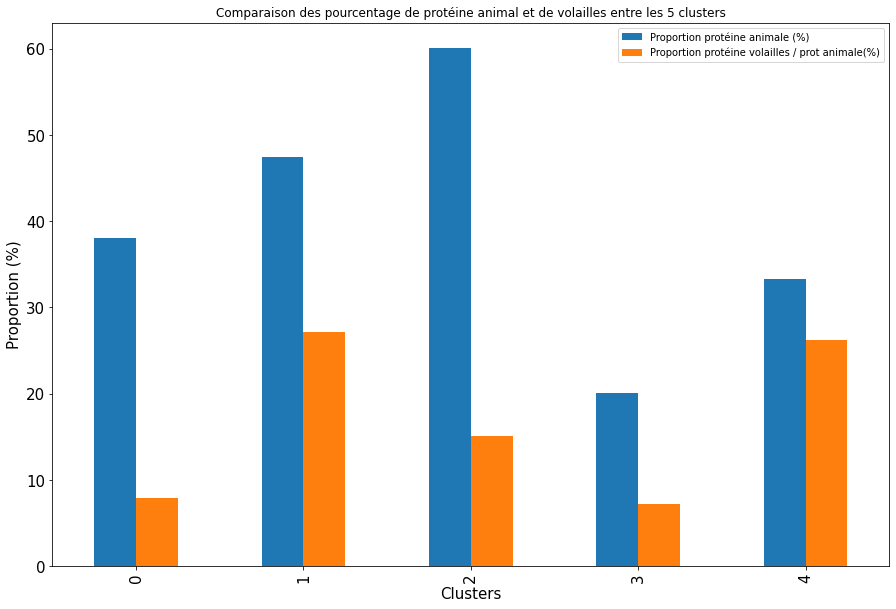

In [475]:
ax = mean_clust.plot.bar(y=["Proportion protéine animale (%)","Proportion protéine volailles / prot animale(%)"],figsize=(15, 10),fontsize=15)
ax.set_ylabel("Proportion (%)", fontsize=15)
ax.set_xlabel("Clusters", fontsize=15)
ax.set_title("Comparaison des pourcentage de protéine animal et de volailles entre les 5 clusters")

Pour la commercialisation du poulet, les clusters 1 et 4 seraientt les plus attractif

<h2> <center> Analyse univariée par cluster 

<h3> Population

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



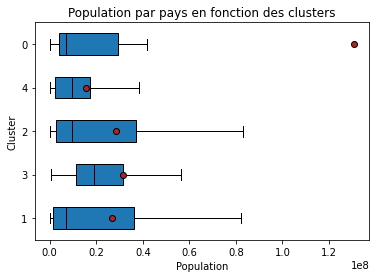

In [476]:
X = "Cluster"
Y = "Population 2018"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Population par pays en fonction des clusters')
plt.xlabel('Population')
plt.ylabel('Cluster')
plt.show()

Les 4 clusters contiennent des pays possedant une population importante. Mais le cluster 4 aurait des pays avec le nombre d'habitant le plus petit

**Détermination si la variable population est relié a un cluster** 

In [477]:
pg.welch_anova(données_finale[["Cluster","Population 2018"]],dv="Population 2018",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,71.09761,1.605553,0.182357,0.063458


La variable population n'est pas relié a un clusteur

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



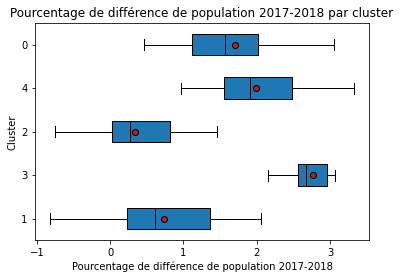

In [478]:
X = "Cluster"
Y = "Différence population (%)"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Pourcentage de différence de population 2017-2018 par cluster')
plt.xlabel('Pourcentage de différence de population 2017-2018')
plt.ylabel('Cluster')
plt.show()

Les clusters 4 et 3 contiennent les pays où l'augmentation de la population entre 2017 et 2018 est la plus élevé. 

**Détermination si la variable différence de population est relié a un cluster**

In [479]:
pg.welch_anova(données_finale[["Cluster","Différence population (%)"]],dv="Différence population (%)",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,71.993455,96.229229,4.047134e-28,0.616161


Il y a une dépendance entre la différence de population et le numéro du cluster car la p-value est de 4.04e-28

<h3> Disponibilité en protéine par habitant (g/personne)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



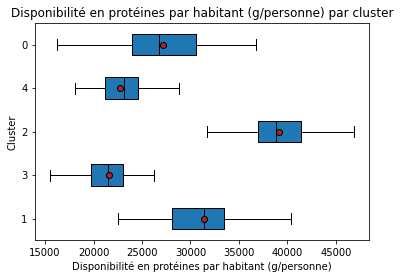

In [480]:
X = "Cluster"
Y = "Disponibilité en protéines par habitant (g/personne)"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Disponibilité en protéines par habitant (g/personne) par cluster')
plt.xlabel('Disponibilité en protéines par habitant (g/personne)')
plt.ylabel('Cluster')
plt.show()

Le cluster 1 et 2 possèdent la disponibilité plus élevé

**Détermination si la variable disponibilité en protéine par habitant  est relié a un cluster**

In [481]:
pg.welch_anova(données_finale[["Cluster","Disponibilité en protéines par habitant (g/personne)"]],dv="Disponibilité en protéines par habitant (g/personne)",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,71.459201,106.196444,2.679700e-29,0.70054


Il y a une dépendance entre la disponibilité en protéine par habitant et le numéro du cluster car la p-value est de 2.68e-29

<h3> Disponibilité en calories par habitant (kcal/personne)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



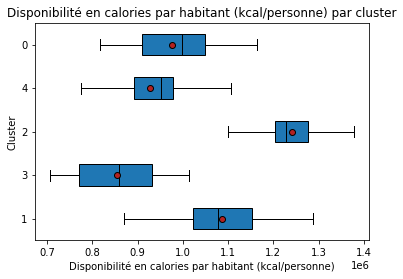

In [482]:
X = "Cluster"
Y = "Disponibilité en calories par habitant (kcal/personne)"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Disponibilité en calories par habitant (kcal/personne) par cluster')
plt.xlabel('Disponibilité en calories par habitant (kcal/personne)')
plt.ylabel('Cluster')
plt.show()

Le cluster 1 et 2 possèdent la disponibilité plus élevé

**Détermination si la variable disponibilité en calories par habitant est relié a un cluster**

In [483]:
pg.welch_anova(données_finale[["Cluster","Disponibilité en calories par habitant (kcal/personne)"]],dv="Disponibilité en calories par habitant (kcal/personne)",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,67.683073,111.010372,5.632341e-29,0.662819


Il y a une dépendance entre la disponibilité en calories par habitant et le numéro du cluster car la p-value est de 5.63e-29

<h3> Proportion de protéines d'origine animale

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



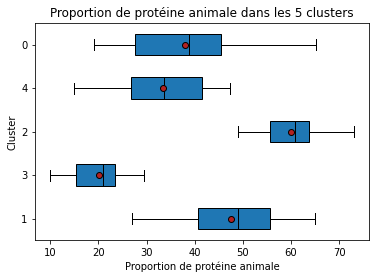

In [484]:
X = "Cluster"
Y = "Proportion protéine animale (%)"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Proportion de protéine animale dans les 5 clusters')
plt.xlabel('Proportion de protéine animale')
plt.ylabel('Cluster')
plt.show()

Le cluster 2 et 1 sont les cluster contenant les pays qui possèdent une proportion en protéine animale la plus élevée

**Détermination si la proportion de protéine animale est relié a un cluster**

In [485]:
pg.welch_anova(données_finale[["Cluster","Proportion protéine animale (%)"]],dv="Proportion protéine animale (%)",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,68.375008,215.992276,5.277749e-38,0.68189


Il y a une dépendance entre la proportion de protéine animale et le numéro du cluster car la p-value est de 5.27e-38

<h3> Proportion de protéine de viande de volailles par rapport au protéine animal

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



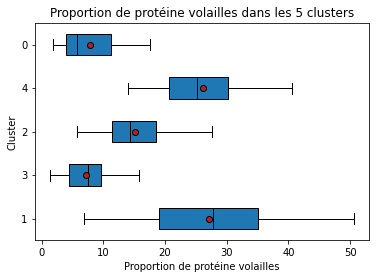

In [486]:
X = "Cluster"
Y = "Proportion protéine volailles / prot animale(%)"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Proportion de protéine volailles dans les 5 clusters')
plt.xlabel('Proportion de protéine volailles')
plt.ylabel('Cluster')
plt.show()

Les cluster 4 et 0 contiennent les pays possédant la disponibilité la plus élevé en viande de volailles.

**Détermination si la proportion de protéine de volaille est relié a un cluster**

In [487]:
pg.welch_anova(données_finale[["Cluster","Proportion protéine volailles / prot animale(%)"]],dv="Proportion protéine volailles / prot animale(%)",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,71.866175,60.04702,3.487472e-22,0.5719


Il y a une dépendance entre la proportion de protéine de volailles et le numéro du cluster car la p-value est de 3.49e-22

<h3> PIB par habitant

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



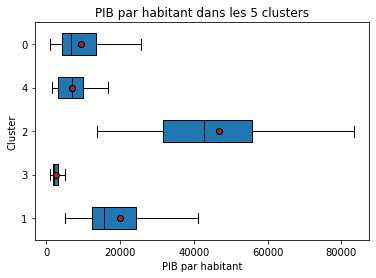

In [488]:
X = "Cluster"
Y = "PIB par habitant"

sous_echantillon = données_finale


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('PIB par habitant dans les 5 clusters')
plt.xlabel('PIB par habitant')
plt.ylabel('Cluster')
plt.show()

Les cluster 2 et 1 contiennent les pays possèdant le PIB par habitant le plus élevé. 

**Détermination si le PIB par habitant est relié a un cluster**

In [489]:
pg.welch_anova(données_finale[["Cluster","PIB par habitant"]],dv="PIB par habitant",between="Cluster")

,Source,ddof1,ddof2,F,p-unc,np2
0,Cluster,4,66.12855,68.497179,8.410950e-23,0.590415


Il y a une dépendance entre le PIB et le numéro du cluster car la p-value est de 8.41e-23

Conclusion des analyses : le cluster 1 est le cluster le plus attractif à la vente du poulet. Ceci est du à la proportion en protéine animale et de volaile élever ainsi qu'un PIB par habitant correcte. 

<h2> <center> Analyse bivariée entre les variables 

In [490]:
from scipy import stats

**Dépendance entre la disponibilité en protéine par habitant et la disponibilité en calories par habitant**

In [491]:
stats.pearsonr(données_finale['Disponibilité en protéines par habitant (g/personne)'],données_finale["Disponibilité en calories par habitant (kcal/personne)"])

(0.8898533459201907, 1.9711726147828478e-57)

**Dépendance entre la disponibilité en protéine par habitant et la différence de population entre 2017 et 2018**

In [492]:
stats.pearsonr(données_finale['Disponibilité en protéines par habitant (g/personne)'],données_finale["Différence population (%)"])

(-0.5544986268196938, 1.0998892865752935e-14)

**Dépendance entre la disponibilité en protéine par habitant et la proportion de protéine animale**

In [493]:
stats.pearsonr(données_finale['Disponibilité en protéines par habitant (g/personne)'],données_finale["Proportion protéine animale (%)"])

(0.7101760250616739, 1.2532475396268239e-26)

**Dépendance entre la disponibilité en protéine par habitant et la proportion de protéine de volailles**

In [494]:
stats.pearsonr(données_finale['Disponibilité en protéines par habitant (g/personne)'],données_finale["Proportion protéine volailles / prot animale(%)"])

(0.0571472893839629, 0.46594922829842655)

**Dépendance entre la disponibilité en protéine par habitant et le PIB par habitant**

In [495]:
stats.pearsonr(données_finale['Disponibilité en protéines par habitant (g/personne)'],données_finale["PIB par habitant"])

(0.7100140667896724, 1.3018327943502237e-26)

**Dépendance entre la proportion de protéine de volailles et la différence de population** 

In [496]:
stats.pearsonr(données_finale['Proportion protéine volailles / prot animale(%)'],données_finale["Différence population (%)"])

(-0.2159166179124318, 0.005347047070767213)

**Dépendance entre la proportion de protéine de volailles et le PIB par habitant** 

In [497]:
stats.pearsonr(données_finale['Proportion protéine volailles / prot animale(%)'],données_finale["PIB par habitant"])

(0.07108450024294433, 0.3642462104845935)

**Dépendance entre la proportion de protéine de volailles et la disponibilité en calories par habitant**

In [498]:
stats.pearsonr(données_finale['Proportion protéine volailles / prot animale(%)'],données_finale["Disponibilité en calories par habitant (kcal/personne)"])

(0.1173408308517496, 0.13335508475298397)

**Dépendance entre la proportion de protéine de volailles et la proportion en protéine d'origine animale**

In [499]:
stats.pearsonr(données_finale['Proportion protéine volailles / prot animale(%)'],données_finale["Proportion protéine animale (%)"])

(0.2661170203439497, 0.0005505782797274765)

<h2> <center> Détermination des pays les plus intéressants pour la commercialisation du poulet 

In [500]:
cluster_1=données_finale.loc[(données_finale['Cluster']==1)]

In [501]:
pays_int_clus1=cluster_1.nlargest(25,"Proportion protéine volailles / prot animale(%)")
pays_int_clus1

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant,Cluster
126,Saint-Vincent-et-les Grenadines,110211.0,0.349641,32795.25,1082955.0,56.138008,50.654243,12466.4,1
144,Trinité-et-Tobago,1389843.0,0.417901,31240.35,1089160.0,51.793434,43.469434,26272.9,1
71,Jamaïque,2934847.0,0.479279,27729.05,1016525.0,48.637620,42.922869,9738.0,1
133,Afrique du Sud,57792518.0,1.373032,30795.05,1056675.0,42.716605,42.286349,12630.8,1
158,Samoa,196129.0,0.397744,32057.95,1105220.0,59.273597,41.240876,6329.4,1
128,Arabie saoudite,33702756.0,1.817388,31718.50,1207055.0,37.675489,38.485034,47596.7,1
12,Bolivie (État plurinational de),11353142.0,1.432047,26718.00,879650.0,48.428962,38.194640,8655.5,1
125,Sainte-Lucie,181889.0,0.516706,31353.50,955935.0,62.328289,37.990288,15261.5,1
9,Bahamas,385637.0,1.016883,29400.75,968710.0,65.052762,37.557252,35500.5,1
67,Israël,8381516.0,1.669948,46289.30,1287355.0,58.894496,37.407953,39543.2,1


Sélection des pays 

In [502]:
sélection_pays_poulet=données_finale.loc[(données_finale['Zone']=='Trinité-et-Tobago') | (données_finale['Zone']=='Afrique du Sud') | (données_finale['Zone']=='Arabie saoudite') | (données_finale['Zone']=='Liban') | (données_finale['Zone']=='Israël') | (données_finale['Zone']=='Émirats arabes unis') | (données_finale['Zone']=='Malaisie') | (données_finale['Zone']=='Brésil') | (données_finale['Zone']=='Colombie') | (données_finale['Zone']=='Koweït')] 
sélection_pays_poulet

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant,Cluster
14,Brésil,209469323.0,0.786927,34915.90,1204500.0,56.199038,28.571429,14596.2,1
27,Colombie,49661048.0,1.535906,26608.50,1135880.0,51.193416,27.706324,14455.6,1
67,Israël,8381516.0,1.669948,46289.30,1287355.0,58.894496,37.407953,39543.2,1
78,Koweït,4137312.0,2.002244,37649.75,1266915.0,49.403781,32.299843,50478.6,1
81,Liban,6859408.0,0.587077,25203.25,1040615.0,32.541636,28.615932,15612.0,1
88,Malaisie,31528033.0,1.361170,28261.95,1037695.0,55.779414,29.937486,27536.9,1
128,Arabie saoudite,33702756.0,1.817388,31718.50,1207055.0,37.675489,38.485034,47596.7,1
133,Afrique du Sud,57792518.0,1.373032,30795.05,1056675.0,42.716605,42.286349,12630.8,1
144,Trinité-et-Tobago,1389843.0,0.417901,31240.35,1089160.0,51.793434,43.469434,26272.9,1
148,Émirats arabes unis,9630959.0,1.515262,40193.80,1208880.0,45.813658,28.800793,66968.3,1


In [503]:
sélection_pays_poulet=sélection_pays_poulet.set_index('Zone')

Text(0.5, 1.0, 'Comparaison des pourcentage de protéine animal et de volailles entre les pays sélectionnés')

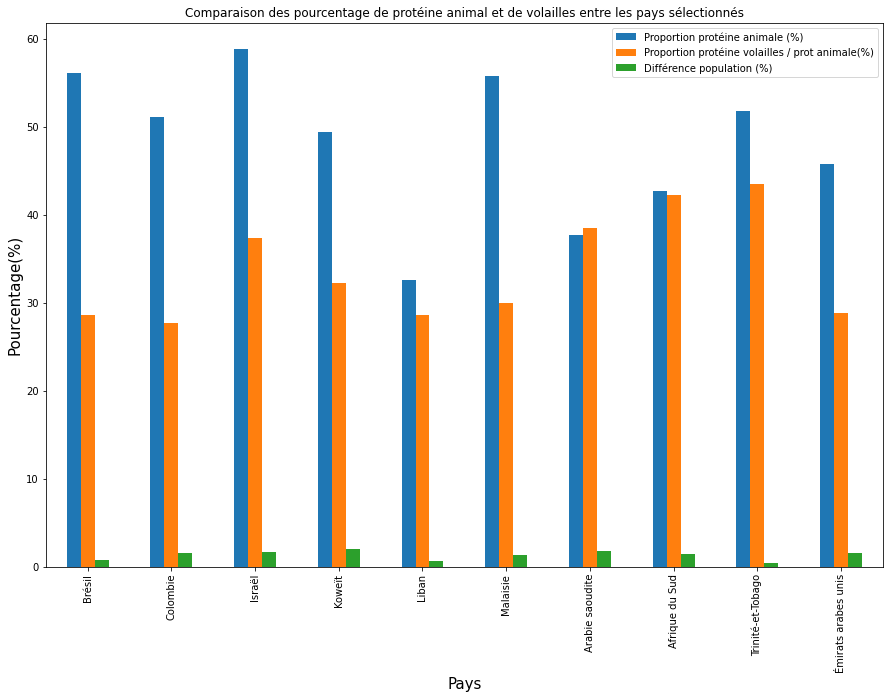

In [504]:
ax = sélection_pays_poulet.plot.bar(y=["Proportion protéine animale (%)","Proportion protéine volailles / prot animale(%)","Différence population (%)"],figsize=(15, 10))
ax.set_ylabel("Pourcentage(%)", fontsize=15)
ax.set_xlabel("Pays", fontsize=15)
ax.set_title("Comparaison des pourcentage de protéine animal et de volailles entre les pays sélectionnés")

<h2> <center> Analyse en composante principale (APC)

In [505]:
n_comp = 3
data_pca =données_finale[["Différence population (%)",'Disponibilité en protéines par habitant (g/personne)',"Disponibilité en calories par habitant (kcal/personne)","Proportion protéine animale (%)","Proportion protéine volailles / prot animale(%)","PIB par habitant"]]

In [506]:
X = data_pca.values

In [507]:
names=données_finale["Zone"]

In [508]:
features = données_finale.columns

In [509]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [510]:
model = pca()

In [511]:
out = model.fit_transform(X_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


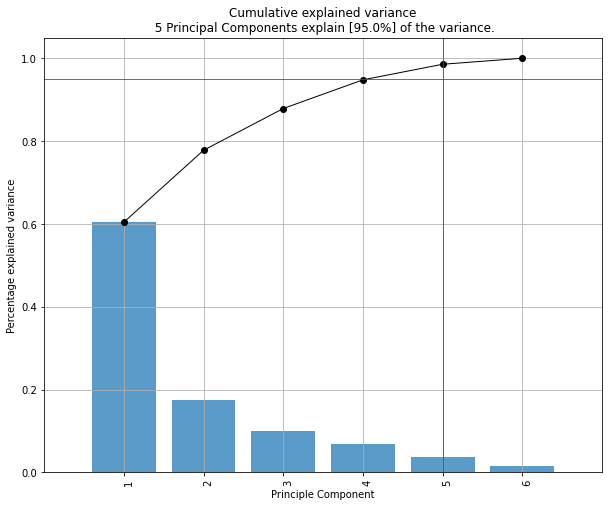

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7e21bd6810>)

<Figure size 432x288 with 0 Axes>

In [512]:
model.plot()

85% de variance pour 3 composante

In [513]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [514]:
final_pca = out['PC'][["PC1","PC2","PC3"]].reset_index()

In [515]:
final_pca["Cluster"] = données_finale["Cluster"]

In [516]:
final_pca.drop("index",inplace=True,axis=1)

In [517]:
final_pca['Zone']=données_finale['Zone']

In [518]:
fig = px.scatter_3d(final_pca, x="PC1", y="PC2", z="PC3", color = "Cluster",opacity= 0.9, hover_name = "Zone",title='Analyse PCA des cluster: Projection 3D ')
fig.show()

<h2> <center> Test d'adéquation : identification d'une variable qui respecte une loi normale 

**Population**


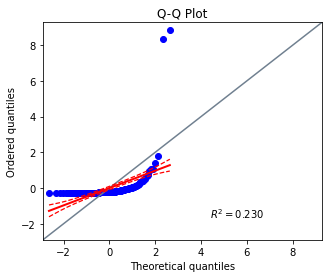

In [519]:
ax = pg.qqplot(données_finale['Population 2018'], dist='norm')

In [520]:
shapiro(données_finale['Population 2018'])

(0.24100840091705322, 1.2993901126646735e-25)

Avec le graphique et la pvalue du test shapiro des valeurs de la population, qui est inférieure à 0.05 (1e-25) on peut conclure que les valeurs ne suivent pas une distribution normale.

**Différence de population 2017-2018**


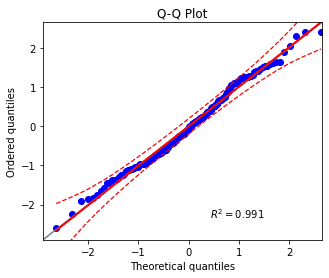

In [521]:
ax = pg.qqplot(données_finale['Différence population (%)'], dist='norm')

In [522]:
shapiro(données_finale['Différence population (%)'])

(0.9896880984306335, 0.2736869752407074)

Avec le graphique et la pvalue du test shapiro des valeurs de la différence de population, qui est supérieur à 0.05 (0.27) on peut conclure que les valeurs suivent une distribution normale.

**Disponibilité en protéines par habitant (g/personne)**


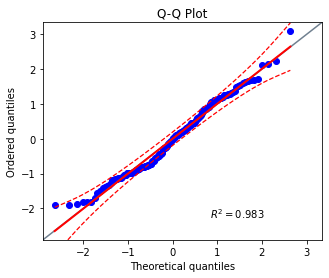

In [523]:
ax = pg.qqplot(données_finale['Disponibilité en protéines par habitant (g/personne)'], dist='norm')

In [524]:
shapiro(données_finale['Disponibilité en protéines par habitant (g/personne)'])

(0.980712890625, 0.021267419680953026)

Avec le graphique et la pvalue du test shapiro des valeurs de la disponibilité en protéine par habitant, qui est inférieure à 0.05 (0.02) on peut conclure que les valeurs ne suivent pas une distribution normale

Disponibilité en calories par habitant (kcal/personne)

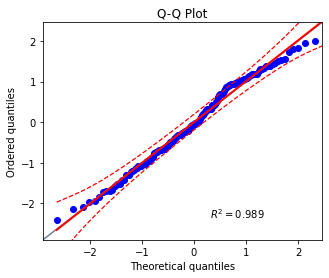

In [525]:
ax = pg.qqplot(données_finale['Disponibilité en calories par habitant (kcal/personne)'], dist='norm')

In [526]:
shapiro(données_finale['Disponibilité en calories par habitant (kcal/personne)'])

(0.9860087037086487, 0.09733150154352188)

Avec le graphique et la pvalue du test shapiro des valeurs de la disponibilité en calorie par habitant, qui est supérieur à 0.05 (0.097) on peut conclure que les valeurs suivent une distribution normale.


**Proportion protéine animale (%)**


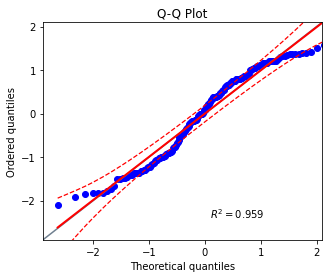

In [527]:
ax = pg.qqplot(données_finale['Proportion protéine animale (%)'], dist='norm')

In [528]:
shapiro(données_finale['Proportion protéine animale (%)'])

(0.9543611407279968, 3.2950047170743346e-05)

Avec le graphique et la pvalue du test shapiro des valeurs de la proportion de protéine animale, qui est inférieure à 0.05 (3.29e-05) on peut conclure que les valeurs ne suivent pas une distribution normale

**Proportion protéine volailles / prot animale(%)**


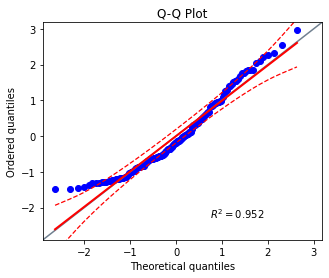

In [529]:
ax = pg.qqplot(données_finale['Proportion protéine volailles / prot animale(%)'], dist='norm')

In [530]:
shapiro(données_finale['Proportion protéine volailles / prot animale(%)'])

(0.9483520984649658, 9.667756785347592e-06)

Avec le graphique et la pvalue du test shapiro des valeurs de la proportion de protéine de volailles, qui est inférieure à 0.05 (9.67e-06) on peut conclure que les valeurs ne suivent pas une distribution normale

**PIB par habitant**


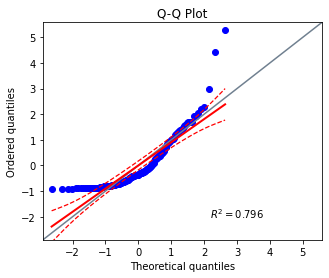

In [531]:
ax = pg.qqplot(données_finale['PIB par habitant'], dist='norm')

In [532]:
shapiro(données_finale['PIB par habitant'])

(0.799797773361206, 9.245266363458807e-14)

Avec le graphique et la pvalue du test shapiro des valeurs de PIB par habitant, qui est inférieure à 0.05 (9.25e-14) on peut conclure que les valeurs ne suivent pas une distribution normale

<h3> <center> Test de comparaison de deux population : cluster 1 et 4

In [533]:
cluster_4=données_finale.loc[(données_finale['Cluster']==4)]


**Test comparaison différence population (variable gausienne)**

In [534]:
Diff_pop_1=cluster_1['Différence population (%)']
Diff_pop_4=cluster_4['Différence population (%)']

In [535]:
stat,p = levene(Diff_pop_1,Diff_pop_4)
p

0.22564738475801396

La p-value est superieur a 0.05 % donc on peut estimer que leurs variance est équivalente

In [536]:
stats.ttest_ind(Diff_pop_1, Diff_pop_4, equal_var = True)

Ttest_indResult(statistic=-7.195426990807171, pvalue=5.492216035824925e-10)

*Test de Kolmogorov-Smirnov :*

In [537]:
ks_2samp(Diff_pop_1,Diff_pop_4)

Ks_2sampResult(statistic=0.6708074534161491, pvalue=2.471968357786736e-07)

La proportion de protéine animale du cluster 1 et 4 ne suivent pas la même distribution, l'hypothèse est rejeté

**Test comparaison disponibilité en calories par habitant (variable gausienne)**

In [538]:
Disp_cal_1=cluster_1['Disponibilité en calories par habitant (kcal/personne)']
Disp_cal_4=cluster_4['Disponibilité en calories par habitant (kcal/personne)']

In [539]:
stat,p = levene(Disp_cal_1,Disp_cal_4)
p

0.18105235570795639

La p-value est superieur a 0.05 % donc on peut estimer que leurs variance est équivalente 

In [540]:
stats.ttest_ind(Disp_cal_1, Disp_cal_4, equal_var = True)

Ttest_indResult(statistic=5.950639449235477, pvalue=9.573074666393406e-08)

*Test de Kolmogorov-Smirnov :*

In [541]:
ks_2samp(Disp_cal_1,Disp_cal_4)

Ks_2sampResult(statistic=0.7320319432120674, pvalue=8.737531254077169e-09)

La proportion de volaille du cluster 1 et 4 ne suivent pas la même distribution. 

<h2> <center> Géoplot

In [542]:
import geoplot 
import geopandas
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc

In [543]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)


In [544]:
world['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [545]:
poulet=world.loc[(world['name']=='Israel') | (world['name']=='Malaysia') | (world['name']=='Colombia') | (world['name']=='Trinidad and Tobago') | (world['name']=='United Arab Emirates') | (world['name']=='Lebanon') | (world['name']=='Brazil') | (world['name']=='Saudi Arabia') | (world['name']=='Kuwait') | (world['name']=='South Africa')]
name_poul=poulet['name']
poulet

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
76,8299706,Asia,Israel,ISR,297000.0,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.0,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
84,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
86,2875422,Asia,Kuwait,KWT,301100.0,"POLYGON ((47.97452 29.97582, 48.18319 29.53448..."
148,31381992,Asia,Malaysia,MYS,863000.0,"MULTIPOLYGON (((100.08576 6.46449, 100.25960 6..."
158,28571770,Asia,Saudi Arabia,SAU,1731000.0,"POLYGON ((34.95604 29.35655, 36.06894 29.19749..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [546]:
name_poul

25             South Africa
29                   Brazil
32                 Colombia
76                   Israel
77                  Lebanon
84     United Arab Emirates
86                   Kuwait
148                Malaysia
158            Saudi Arabia
175     Trinidad and Tobago
Name: name, dtype: object

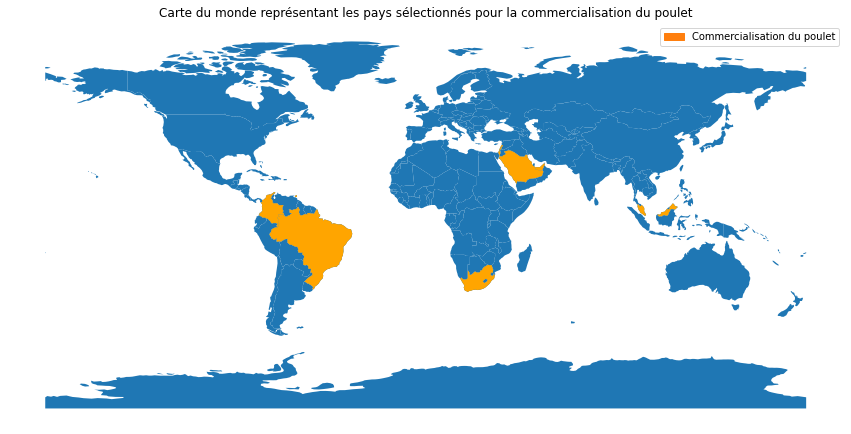

In [547]:
import matplotlib.patches as mpatches
ax=world.plot(figsize=(15,8))
poulet.plot(ax=ax,color='orange')
orange_patch = mpatches.Patch(color='tab:orange', label="Commercialisation du poulet")
ax.set_axis_off()
ax.set_title("Carte du monde représentant les pays sélectionnés pour la commercialisation du poulet")
plt.legend(handles=[orange_patch])

<h3> <center> Commercialisation avec un point de vue business

In [548]:
poulet2=world.loc[(world['name']=='Israel') | (world['name']=='United Arab Emirates') | (world['name']=='Lebanon') | (world['name']=='Saudi Arabia') | (world['name']=='South Africa')]
name_poul2=poulet2['name']

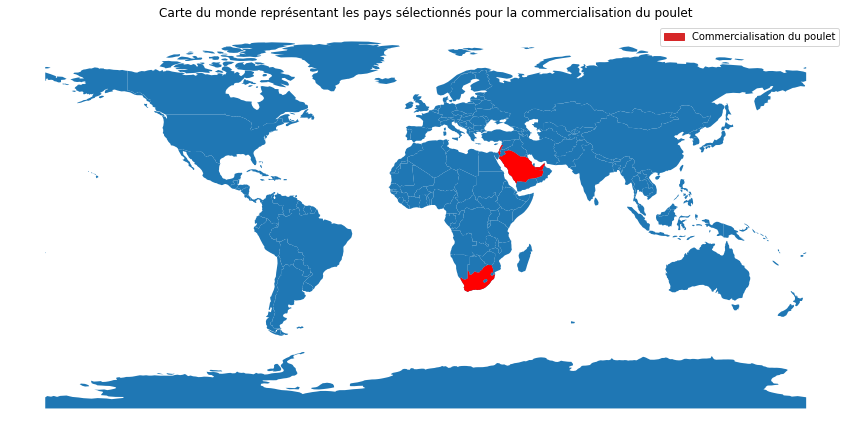

In [549]:
import matplotlib.patches as mpatches
ax=world.plot(figsize=(15,8))
poulet2.plot(ax=ax,color='red')
orange_patch = mpatches.Patch(color='tab:red', label="Commercialisation du poulet")
ax.set_axis_off()
ax.set_title("Carte du monde représentant les pays sélectionnés pour la commercialisation du poulet")
plt.legend(handles=[orange_patch])

<h3> <center> Centroïdes

In [550]:
df_groupby_cluster_pca=final_pca.groupby("Cluster").mean()

df_groupby_cluster_pca

,PC1,PC2,PC3
Cluster,,,
0,-1.015786,-0.702968,-0.269014
1,0.592326,0.841321,-0.121937
2,2.440889,-0.561306,-0.012222
3,-2.742516,-0.797333,0.241262
4,-1.514695,0.895997,0.357309


In [551]:
df_groupby_cluster_pca['Cluster']=['5','5','5','5','5']

df_groupby_cluster_pca['Zone']=['Centroïde cluster 0','Centroïde cluster 1','Centroïde cluster 2','Centroïde cluster 3','Centroïde cluster 4']

In [552]:
final_pca_centroide = final_pca.append(df_groupby_cluster_pca)

final_pca_centroide

,PC1,PC2,PC3,Cluster,Zone
0,0.676986,-0.370515,-1.086707,1,Arménie
1,-3.072682,-0.796801,-0.142237,3,Afghanistan
2,1.762412,-1.068013,-1.341520,2,Albanie
3,-0.325699,-1.202573,0.140404,1,Algérie
4,-2.457324,0.608089,1.253400,4,Angola
...,...,...,...,...,...
0,-1.015786,-0.702968,-0.269014,5,Centroïde cluster 0
1,0.592326,0.841321,-0.121937,5,Centroïde cluster 1
2,2.440889,-0.561306,-0.012222,5,Centroïde cluster 2
3,-2.742516,-0.797333,0.241262,5,Centroïde cluster 3


In [553]:
final_pca_centroide.to_csv("/content/drive/MyDrive/Openclassroom/P5/Centroïdes.csv",sep = ';')

In [554]:
fig = px.scatter_3d(final_pca_centroide, x="PC1", y="PC2", z="PC3", color = "Cluster",opacity= 0.9, hover_name = "Zone",title='Analyse PCA des cluster: Projection 3D ')
fig.show()

<h2> <center> Cercle de corrélation

In [555]:
from sklearn.decomposition import PCA 

In [556]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(X_scaled)
for i in range(0, 3):
    données_finale['PC' + str(i + 1)] = reduced[:, i]

In [557]:
données_finale.head()

,Zone,Population 2018,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant,Cluster,PC1,PC2,PC3
0,Arménie,2951745.0,0.236146,34419.50,1092080.0,48.048780,11.322004,12715.0,1,0.676986,-0.370515,-1.086707
1,Afghanistan,37171921.0,2.412953,20257.50,743870.0,19.441441,4.726599,2190.2,3,-3.072682,-0.796801,-0.142237
2,Albanie,2882740.0,-0.049546,42219.55,1226765.0,53.375983,5.701328,13601.3,2,1.762412,-1.068013,-1.341520
3,Algérie,42228408.0,2.027629,33514.30,1212165.0,26.922239,8.576052,11479.5,1,-0.325699,-1.202573,0.140404
4,Angola,30809787.0,3.330411,19363.25,869795.0,30.744581,24.524831,6933.5,4,-2.457324,0.608089,1.253400


In [558]:
X_scaled.shape

(165, 6)

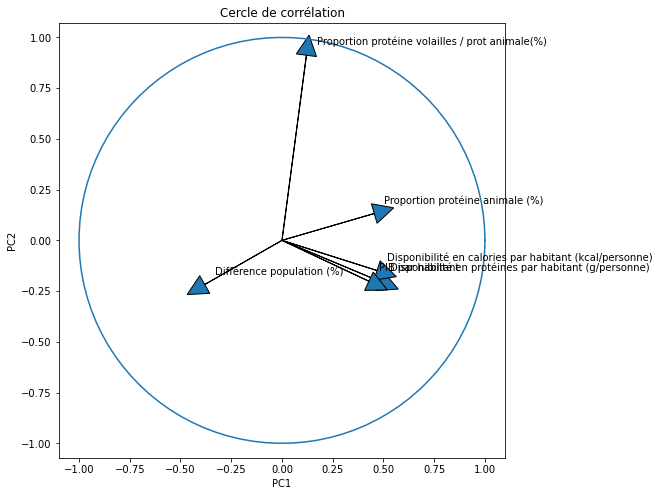

In [559]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             données_finale.drop(labels=['Zone','Population 2018'],axis=1).columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle de corrélation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

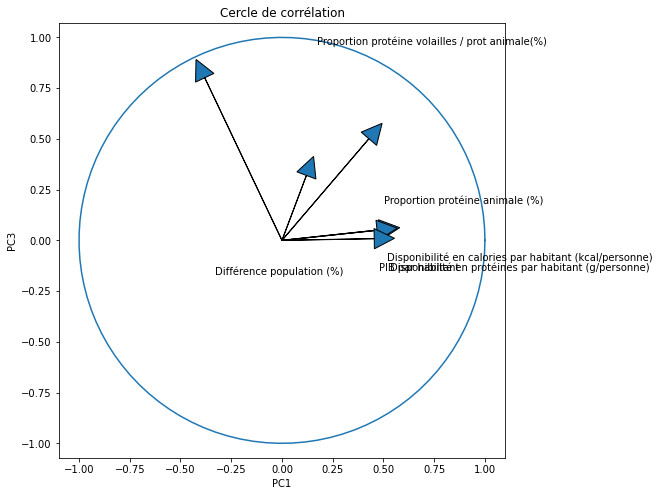

In [560]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[2, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             données_finale.drop(labels=['Zone','Population 2018'],axis=1).columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle de corrélation')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

<h2> <center> Heatmap

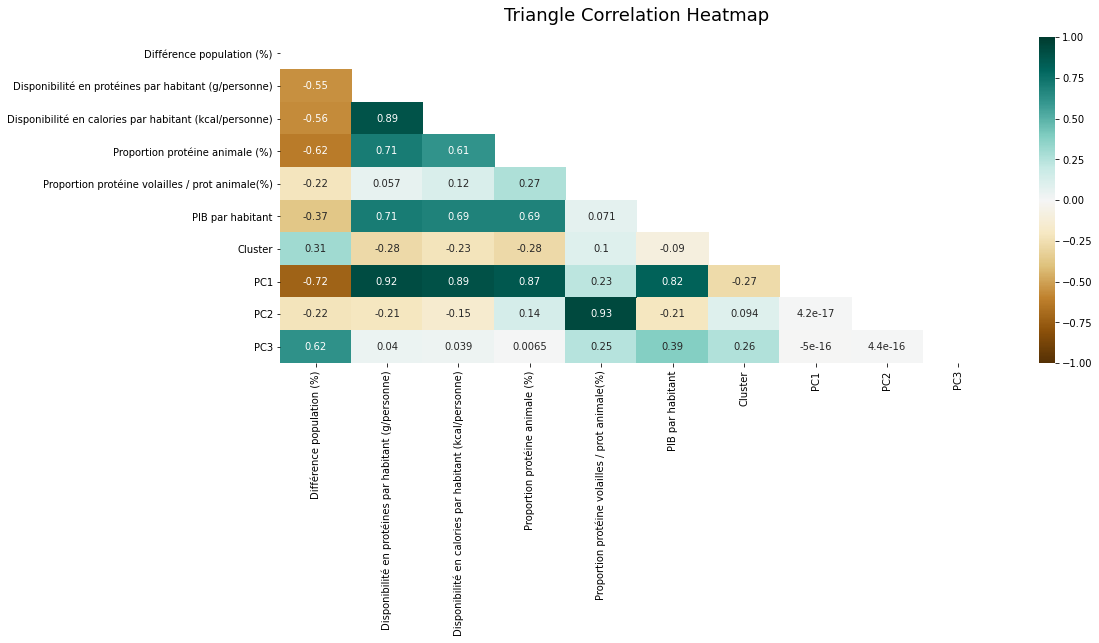

In [561]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(données_finale.drop(labels=['Zone','Population 2018'],axis=1).corr(), dtype=np.bool))
heatmap = sns.heatmap(données_finale.drop(labels=['Zone','Population 2018'],axis=1).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


<h3> <center> PCA en 2D

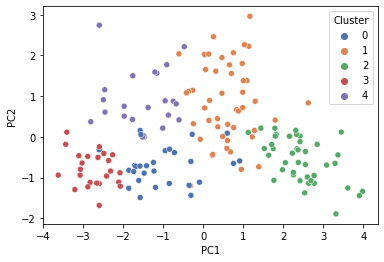

In [562]:
sns.scatterplot(x="PC1", y="PC2", data= données_finale, hue= "Cluster", palette= "deep")

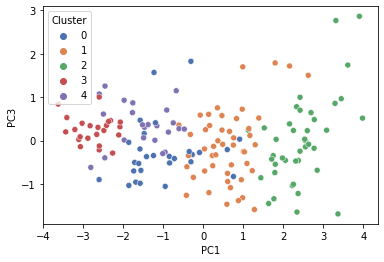

In [563]:
sns.scatterplot(x="PC1", y="PC3", data= données_finale, hue= "Cluster", palette= "deep")

<h2> <center> Radar

In [564]:
import plotly.graph_objects as go

In [565]:
df_kiviat_clust = mean_clust.drop(labels=['Population 2018'],axis=1)

In [566]:
label = [1,2,3,4,5]
df_kiviat_clust["disp_prot"]=pd.qcut(df_kiviat_clust["Disponibilité en protéines par habitant (g/personne)"], q=[0,0.2,0.5,0.65,0.80,1], labels = label)
df_kiviat_clust["diff_pop"]=pd.qcut(df_kiviat_clust["Différence population (%)"], q=[0,0.2,0.5,0.65,0.80,1], labels = label)
df_kiviat_clust["disp_cal"]=pd.qcut(df_kiviat_clust["Disponibilité en calories par habitant (kcal/personne)"], q=[0,0.2,0.5,0.65,0.80,1], labels = label)
df_kiviat_clust["prop_animale"]=pd.qcut(df_kiviat_clust["Proportion protéine animale (%)"], q=[0,0.2,0.5,0.65,0.80,1], labels = label)
df_kiviat_clust["prop_volaille"]=pd.qcut(df_kiviat_clust["Proportion protéine volailles / prot animale(%)"], q=[0,0.2,0.5,0.65,0.80,1], labels = label)
df_kiviat_clust["pib"]=pd.qcut(df_kiviat_clust["PIB par habitant"], q=[0,0.2,0.5,0.65,0.80,1], labels = label)

In [567]:
df_kiviat_clust.head()

,Différence population (%),Disponibilité en protéines par habitant (g/personne),Disponibilité en calories par habitant (kcal/personne),Proportion protéine animale (%),Proportion protéine volailles / prot animale(%),PIB par habitant,disp_prot,diff_pop,disp_cal,prop_animale,prop_volaille,pib
Cluster,,,,,,,,,,,,
0,1.707972,27175.292857,9.754234e+05,38.026025,7.886916,9530.417857,2,2,2,2,2,2
1,0.730943,31403.631633,1.085413e+06,47.431958,27.097162,19840.753061,4,2,4,4,5,4
2,0.337384,39154.084146,1.241881e+06,60.020154,15.144094,46761.160976,5,1,5,5,2,5
3,2.766663,21587.164583,8.554535e+05,20.078773,7.207911,2571.095833,1,5,1,1,1,1
4,1.984027,22753.147826,9.270683e+05,33.342290,26.227630,7051.413043,2,4,2,2,4,2


In [568]:
df_kiviat_cluster=df_kiviat_clust.reset_index()


In [569]:
df_kiviat_cluster.columns

Index(['Cluster', 'Différence population (%)',
       'Disponibilité en protéines par habitant (g/personne)',
       'Disponibilité en calories par habitant (kcal/personne)',
       'Proportion protéine animale (%)',
       'Proportion protéine volailles / prot animale(%)', 'PIB par habitant',
       'disp_prot', 'diff_pop', 'disp_cal', 'prop_animale', 'prop_volaille',
       'pib'],
      dtype='object')

In [570]:
stats2=df_kiviat_cluster[df_kiviat_cluster.Cluster==0][['disp_prot','diff_pop','disp_cal', 'prop_animale',
           'prop_volaille',"pib"]].values

In [571]:
labels=['disp_prot','diff_pop','disp_cal', 'prop_animale',
           'prop_volaille',"pib"]

In [572]:
angles2=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats2=np.concatenate((stats2,[stats2[0]]))
angles2=np.concatenate((angles2,[angles2[0]]))
angles2[:-1].shape

(6,)

In [573]:
angles2

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        ])

In [574]:
radar=df_kiviat_cluster[['Cluster','disp_prot','diff_pop','disp_cal', 'prop_animale',
           'prop_volaille',"pib"]]

In [575]:
radar['Cluster'] = radar['Cluster'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



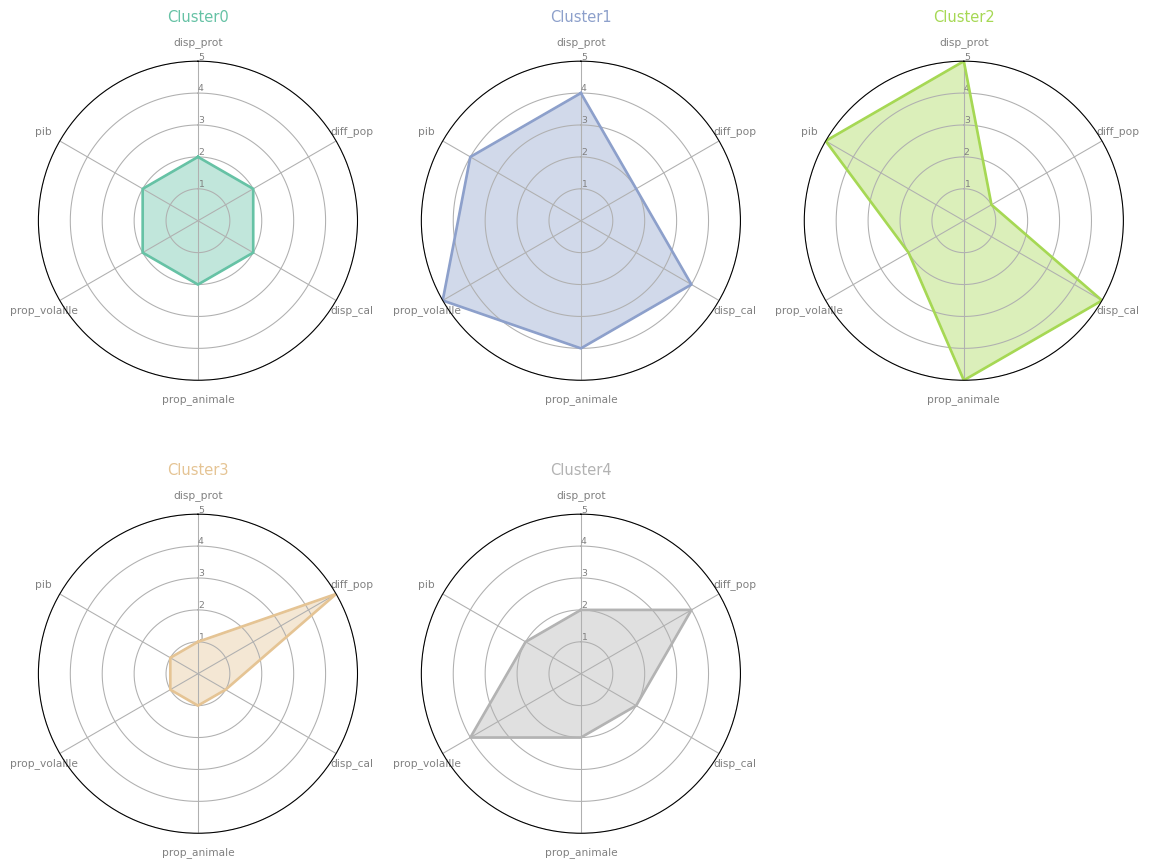

In [576]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = radar
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",'5'], color="grey", size=7)
    plt.ylim(0,5)

    # Ind1
    values=df.loc[row].drop('Cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1400/my_dpi, 1100/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Cluster'+df['Cluster'][row], color=my_palette(row))